# 1. CONFIGURAÇÃO INICIAL

In [5]:
# =============================================================================
# CÉLULA DE CONFIGURAÇÃO: IMPORTS E PARÂMETROS GLOBAIS
# =============================================================================

# --- Imports de Bibliotecas Padrão ---
import warnings
import logging
import os
import time

#!pip install umap-learn
# --- Imports de Análise de Dados e Numérica ---
import numpy as np
import pandas as pd
from scipy import stats

# --- Imports de Machine Learning (Scikit-learn) ---
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, HDBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import (
    silhouette_score, 
    davies_bouldin_score, 
    calinski_harabasz_score
)
from sklearn.preprocessing import MinMaxScaler # Para visualização

# --- Imports de Bibliotecas Astronômicas ---
from astropy.timeseries import LombScargle
from astropy import units as u

# --- Imports de Redução de Dimensionalidade e Visualização ---
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# --- Configurações Globais ---
# Suprimir warnings para um notebook limpo
warnings.filterwarnings('ignore')

# Configuração de Logging
logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Semente aleatória para reprodutibilidade
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
logger.info(f"Semente aleatória global definida como {RANDOM_STATE}")

# Configurações de Visualização (Matplotlib e Seaborn)
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.format'] = 'pdf' # Formato vetorial para publicações

# Diretório para salvar figuras
FIG_DIR = "figures"
if not os.path.exists(FIG_DIR):
    os.makedirs(FIG_DIR)
    logger.info(f"Diretório de figuras criado em: {FIG_DIR}")

# --- Funções Auxiliares ---
def save_figure(fig, name, tight_layout=True):
    """
    Salva uma figura matplotlib em múltiplos formatos (PDF, PNG) 
    no diretório de figuras definido.
    """
    if tight_layout:
        plt.tight_layout()
        
    path_pdf = os.path.join(FIG_DIR, f"{name}.pdf")
    path_png = os.path.join(FIG_DIR, f"{name}.png")
    
    fig.savefig(path_pdf, bbox_inches='tight')
    fig.savefig(path_png, bbox_inches='tight')
    logger.info(f"Figura salva em {path_pdf} e {path_png}")


def sm():
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",top = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",top = True,right = True, length=8,width=1,labelsize=15)
    plt.tick_params(axis='both',which='minor', direction = "in",bottom = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",bottom = True,right = True, length=8,width=1,labelsize=15)



logger.info("Ambiente configurado com sucesso.")

2025-12-30 01:46:58,227 - INFO - Semente aleatória global definida como 42
2025-12-30 01:46:58,231 - INFO - Ambiente configurado com sucesso.


In [6]:
# =============================================================================
# REGISTRO LOCAL DA FONTE COURIER PRIME (EMBUTIDA NO PROJETO)
# =============================================================================
import matplotlib.font_manager as fm
from pathlib import Path

FONT_DIR = Path("fonts")

for font_path in FONT_DIR.glob("*.ttf"):
    fm.fontManager.addfont(str(font_path))

# Verificação explícita
available_fonts = {f.name for f in fm.fontManager.ttflist}
assert "Courier Prime" in available_fonts, "Courier Prime NÃO encontrada!"

print("Courier Prime registrada com sucesso.")

Courier Prime registrada com sucesso.


In [7]:
import matplotlib.font_manager as fm

[f.name for f in fm.fontManager.ttflist if "Courier Prime" in f.name]


# =============================================================================
# CONFIGURAÇÃO GLOBAL DE FONTE – PAPER (Courier Prime)
# =============================================================================
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams.update({

    # Fonte principal
    "font.family": "monospace",
    "font.monospace": ["Courier Prime"],

    # Tamanhos base (ajuste fino depois, se necessário)
    "font.size": 13,
    "axes.labelsize": 14,
    "axes.titlesize": 15,
    "legend.fontsize": 12,

    # Mathtext (importante para labels com símbolos)
    "mathtext.fontset": "custom",
    "mathtext.rm": "Courier Prime",
    "mathtext.it": "Courier Prime:italic",
    "mathtext.bf": "Courier Prime:bold",

    # Aparência de eixos (paper-grade)
    "axes.linewidth": 1.0,

    # Exportação
    "pdf.fonttype": 42,   # TrueType → garante embedding da fonte
    "ps.fonttype": 42,

    "savefig.format": "pdf",
    "savefig.dpi": 300,
})

In [8]:
import sys
!{sys.executable} -m pip install umap-learn

In [9]:
# =============================================================================
# CÉLULA DE VERIFICAÇÃO DE VERSÃO
# =============================================================================
import sys
import sklearn
import astropy
import statsmodels
import plotly

logger.info(f"Versão Python: {sys.version.split()}")
logger.info(f"Versão NumPy: {np.__version__}")
logger.info(f"Versão Pandas: {pd.__version__}")
logger.info(f"Versão Scikit-learn: {sklearn.__version__}")
logger.info(f"Versão Astropy: {astropy.__version__}")
logger.info(f"Versão UMAP: {umap.__version__}")
logger.info(f"Versão Plotly: {plotly.__version__}")
logger.info(f"Versão Seaborn: {sns.__version__}")

2025-12-30 01:46:58,879 - INFO - Versão Python: ['3.11.14', '|', 'packaged', 'by', 'conda-forge', '|', '(main,', 'Oct', '22', '2025,', '22:56:31)', '[Clang', '19.1.7', ']']
2025-12-30 01:46:58,880 - INFO - Versão NumPy: 2.3.5
2025-12-30 01:46:58,881 - INFO - Versão Pandas: 2.3.3
2025-12-30 01:46:58,881 - INFO - Versão Scikit-learn: 1.8.0
2025-12-30 01:46:58,881 - INFO - Versão Astropy: 7.2.0
2025-12-30 01:46:58,882 - INFO - Versão UMAP: 0.5.9.post2
2025-12-30 01:46:58,882 - INFO - Versão Plotly: 6.5.0
2025-12-30 01:46:58,882 - INFO - Versão Seaborn: 0.13.2


In [10]:
from matplotlib.ticker import AutoMinorLocator

def sm_ted(ax=None, labelsize=15, minor_len=5, major_len=8, width=1):
    """
    Aplica estilo tipo SuperMongo em um eixo (ax).
    Se ax=None, aplica no eixo atual (plt.gca()).
    """
    if ax is None:
        ax = plt.gca()

    # Minor ticks (em ambos os eixos)
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    # Ticks: major/minor, em todas as bordas
    ax.tick_params(axis='both', which='minor',
                   direction='in', top=True, right=True,
                   length=minor_len, width=width, labelsize=labelsize)
    ax.tick_params(axis='both', which='major',
                   direction='in', top=True, right=True,
                   length=major_len, width=width, labelsize=labelsize)

    # Também garante bottom/left (por segurança)
    ax.tick_params(axis='both', which='minor',
                   direction='in', bottom=True, left=True)
    ax.tick_params(axis='both', which='major',
                   direction='in', bottom=True, left=True)

    return ax

In [11]:
# =============================================================================
# CÉLULA DE CARGA DE DADOS
# =============================================================================
logger.info("Iniciando Etapa 2.1: Aquisição de Dados...")

# --- Caminhos dos arquivos de dados ---
DATA_PATH_TS = "table3.csv"
DATA_PATH_PARAMS = "table2.csv"
DATA_PATH_CYCLES = "table4.csv"

# --- Carregar Séries Temporais (Entrada Principal) ---
try:
    df_timeseries = pd.read_csv(DATA_PATH_TS)
    logger.info(f"Carregado {DATA_PATH_TS}: {df_timeseries.shape} observações")
except FileNotFoundError:
    logger.error(f"ERRO: Arquivo {DATA_PATH_TS} não encontrado.")
    # Adicionar aqui lógica de download de backup se necessário
    df_timeseries = pd.DataFrame() # Placeholder

# --- Carregar Parâmetros Estelares (Validação) ---
try:
    df_params = pd.read_csv(DATA_PATH_PARAMS)
    logger.info(f"Carregado {DATA_PATH_PARAMS}: {df_params.shape} estrelas (para validação)")
except FileNotFoundError:
    logger.error(f"ERRO: Arquivo {DATA_PATH_PARAMS} não encontrado.")
    df_params = pd.DataFrame()

# --- Carregar Ciclos Conhecidos (Validação) ---
try:
    df_cycles = pd.read_csv(DATA_PATH_CYCLES)
    logger.info(f"Carregado {DATA_PATH_CYCLES}: {df_cycles.shape} ciclos (para validação)")
except FileNotFoundError:
    logger.error(f"ERRO: Arquivo {DATA_PATH_CYCLES} não encontrado.")
    df_cycles = pd.DataFrame()

logger.info("Dados carregados. Iniciando pré-processamento de séries temporais...")


# --- Limpeza e Pré-processamento de Séries Temporais (df_timeseries) ---
if not df_timeseries.empty:
    # Renomear colunas para clareza e consistência
    df_timeseries = df_timeseries.rename(columns={
        'Name': 'star_id',
        'BJD': 'time_bjd',
        'S': 's_index'
    })

    # CORREÇÃO: Limpar espaços em branco dos nomes das estrelas
    df_timeseries['star_id'] = df_timeseries['star_id'].str.strip()

    # Selecionar apenas as colunas necessárias
    cols_to_keep = ['star_id', 'time_bjd', 's_index']
    df_timeseries = df_timeseries[cols_to_keep]

    # Converter BJD (dias) para Anos Decimais. 
    # BJD em table3.csv é BJD-2440000 [4]
    df_timeseries['time_yr'] = df_timeseries['time_bjd'] / 365.25

    # Verificar NaNs nos dados de entrada
    nan_count = df_timeseries.isna().sum().sum()
    logger.info(f"Total de valores NaN encontrados nas séries temporais brutas: {nan_count}")

    # Remover quaisquer linhas com NaNs no S-index ou no tempo
    df_timeseries = df_timeseries.dropna()

    # Verificar o número de estrelas únicas
    n_unique_stars = df_timeseries['star_id'].nunique()
    logger.info(f"Dados de séries temporais limpos para {n_unique_stars} estrelas únicas.")

    # Exibir o cabeçalho dos dados processados
    print("\n--- Cabeçalho das Séries Temporais Processadas (df_timeseries) ---")
    print(df_timeseries.head())
else:
    logger.error("DataFrames de séries temporais estão vazios. Encerrando.")

# --- Limpeza dos dados de validação ---
if not df_params.empty:
    df_params = df_params.rename(columns={'Name': 'star_id'})
    # CORREÇÃO: Limpar espaços em branco dos nomes das estrelas [4]
    df_params['star_id'] = df_params['star_id'].str.strip()

if not df_cycles.empty:
    df_cycles = df_cycles.rename(columns={'Name': 'star_id', 'Per': 'val_period'})
    # CORREÇÃO: Limpar espaços em branco dos nomes das estrelas [4]
    df_cycles['star_id'] = df_cycles['star_id'].str.strip()

2025-12-30 01:46:58,897 - INFO - Iniciando Etapa 2.1: Aquisição de Dados...
2025-12-30 01:46:58,937 - INFO - Carregado table3.csv: (52372, 7) observações
2025-12-30 01:46:58,939 - INFO - Carregado table2.csv: (710, 14) estrelas (para validação)
2025-12-30 01:46:58,940 - INFO - Carregado table4.csv: (138, 6) ciclos (para validação)
2025-12-30 01:46:58,941 - INFO - Dados carregados. Iniciando pré-processamento de séries temporais...
2025-12-30 01:46:58,953 - INFO - Total de valores NaN encontrados nas séries temporais brutas: 0
2025-12-30 01:46:58,957 - INFO - Dados de séries temporais limpos para 710 estrelas únicas.



--- Cabeçalho das Séries Temporais Processadas (df_timeseries) ---
     star_id   time_bjd  s_index    time_yr
0  HD 185144  13237.736   0.2112  36.242946
1  HD 185144  13237.738   0.2120  36.242951
2  HD 185144  13237.739   0.2094  36.242954
3  HD 185144  13237.740   0.2118  36.242957
4  HD 185144  13237.740   0.2094  36.242957


In [12]:
#grouped_ts.sample(2)

2025-12-30 01:46:58,965 - INFO - Plotando séries temporais de exemplo...
2025-12-30 01:46:59,305 - INFO - maxp pruned
2025-12-30 01:46:59,307 - INFO - cmap pruned
2025-12-30 01:46:59,308 - INFO - post pruned
2025-12-30 01:46:59,309 - INFO - DSIG dropped
2025-12-30 01:46:59,310 - INFO - GSUB pruned
2025-12-30 01:46:59,311 - INFO - glyf pruned
2025-12-30 01:46:59,311 - INFO - Added gid0 to subset
2025-12-30 01:46:59,311 - INFO - Added first four glyphs to subset
2025-12-30 01:46:59,311 - INFO - Closing glyph list over 'GSUB': 41 glyphs before
2025-12-30 01:46:59,312 - INFO - Glyph names: ['.notdef', 'A', 'B', 'D', 'E', 'H', 'I', 'J', 'NULL', 'S', 'a', 'colon', 'd', 'e', 'eight', 'five', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'v', 'x', 'zero']
2025-12-30 01:46:59,312 - INFO - Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 2

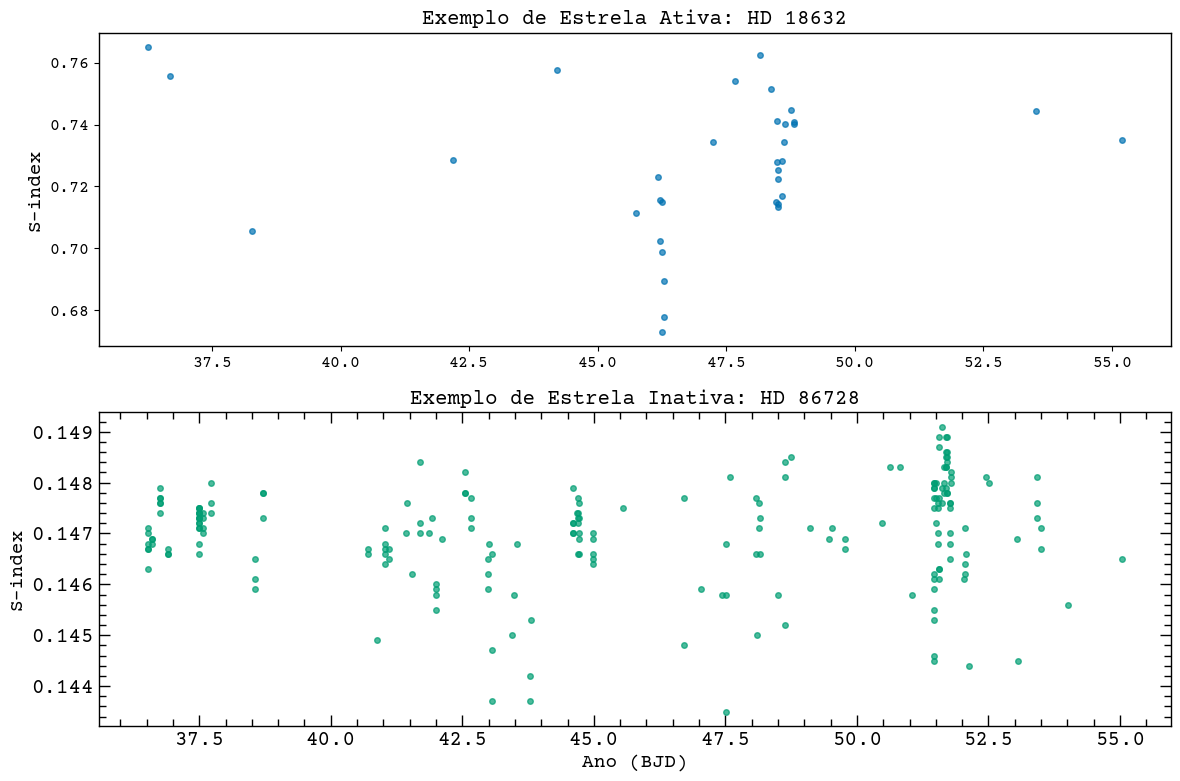

In [13]:
# =============================================================================
# CÉLULA DE VISUALIZAÇÃO EXPLORATÓRIA
# =============================================================================
logger.info("Plotando séries temporais de exemplo...")

if not df_timeseries.empty:
    # Agrupar dados para acesso rápido
    grouped_ts = df_timeseries.groupby('star_id')

    # Identificar estrelas de exemplo (baseado no SSD de table2.csv)
    # HD 18632 (alta atividade, SSD=0.02275) 
    # HD 86728 (baixa atividade, SSD=0.00102) 
    star_active = "HD 18632"
    star_inactive = "HD 86728"

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=False)
    sm()

    # Plot 1: Estrela Ativa
    if star_active in grouped_ts.groups:
        data_active = grouped_ts.get_group(star_active)
        ax1.plot(data_active['time_yr'], data_active['s_index'], 
                 marker='o', markersize=4, linestyle='none', alpha=0.7)
        ax1.set_title(f'Exemplo de Estrela Ativa: {star_active}')
        ax1.set_ylabel('S-index')
        sm()
    else:
        logger.warning(f"Estrela de exemplo {star_active} não encontrada.")

    # Plot 2: Estrela Inativa
    if star_inactive in grouped_ts.groups:
        data_inactive = grouped_ts.get_group(star_inactive)
        ax2.plot(data_inactive['time_yr'], data_inactive['s_index'], 
                 marker='o', markersize=4, linestyle='none', alpha=0.7, color='C1')
        ax2.set_title(f'Exemplo de Estrela Inativa: {star_inactive}')
        ax2.set_ylabel('S-index')
        ax2.set_xlabel('Ano (BJD)')
    else:
        logger.warning(f"Estrela de exemplo {star_inactive} não encontrada.")

        
    sm()
    save_figure(fig, "01_exploratory_timeseries_examples")
    plt.show()

2025-12-30 01:46:59,627 - INFO - Plotando séries temporais de exemplo (sm_ted, eixo x contínuo)...
2025-12-30 01:46:59,763 - INFO - maxp pruned
2025-12-30 01:46:59,763 - INFO - cmap pruned
2025-12-30 01:46:59,764 - INFO - post pruned
2025-12-30 01:46:59,764 - INFO - DSIG dropped
2025-12-30 01:46:59,765 - INFO - GSUB pruned
2025-12-30 01:46:59,766 - INFO - glyf pruned
2025-12-30 01:46:59,766 - INFO - Added gid0 to subset
2025-12-30 01:46:59,766 - INFO - Added first four glyphs to subset
2025-12-30 01:46:59,766 - INFO - Closing glyph list over 'GSUB': 34 glyphs before
2025-12-30 01:46:59,767 - INFO - Glyph names: ['.notdef', 'B', 'D', 'H', 'J', 'NULL', 'S', 'Y', 'a', 'c', 'd', 'e', 'eight', 'five', 'four', 'hyphen', 'i', 'n', 'nine', 'nonmarkingreturn', 'one', 'parenleft', 'parenright', 'period', 'r', 'seven', 'six', 'space', 't', 'three', 'two', 'v', 'x', 'zero']
2025-12-30 01:46:59,767 - INFO - Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 37, 39, 43

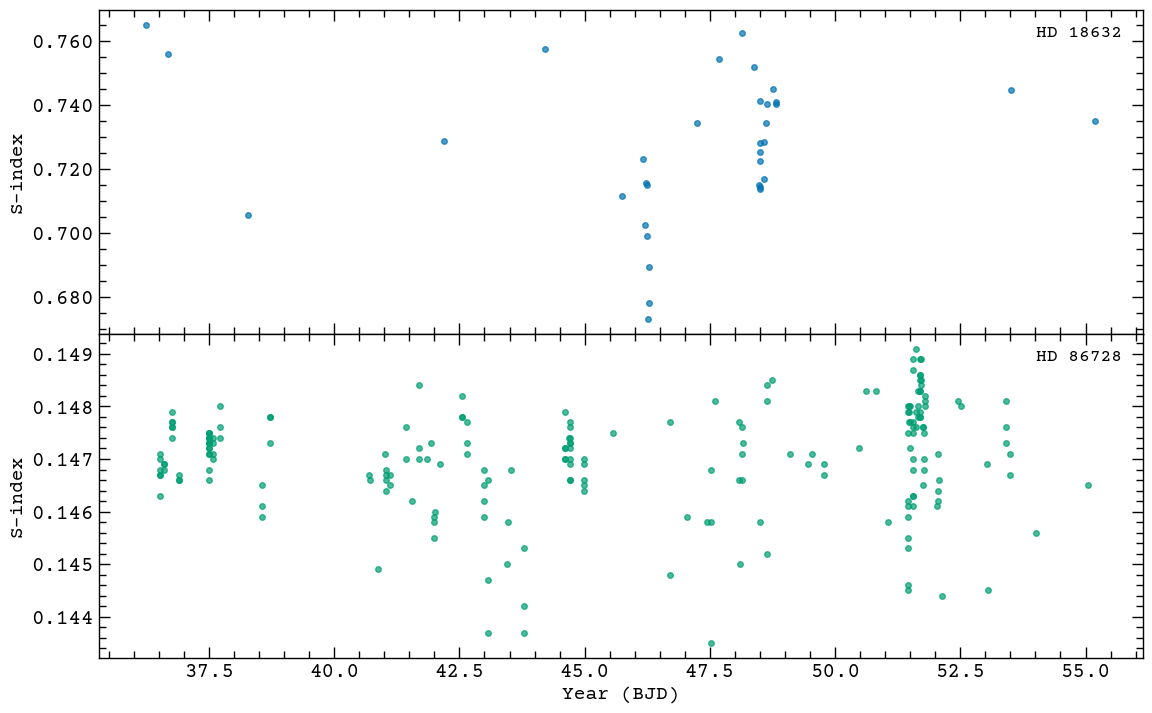

In [14]:
from matplotlib.ticker import FormatStrFormatter

# =============================================================================
# CÉLULA DE VISUALIZAÇÃO EXPLORATÓRIA (sm_ted, eixo x contínuo, sem espaço)
# =============================================================================
logger.info("Plotando séries temporais de exemplo (sm_ted, eixo x contínuo)...")

if not df_timeseries.empty:
    grouped_ts = df_timeseries.groupby('star_id')

    star_active = "HD 18632"
    star_inactive = "HD 86728"

    fig, (ax1, ax2) = plt.subplots(
        2, 1,
        figsize=(12, 8),
        sharex=True,
        gridspec_kw={'hspace': 0.0}   # sem espaço entre painéis
    )

    # --- formatador do eixo y com 3 casas decimais ---
    yfmt = FormatStrFormatter('%.3f')

    # -------------------------------------------------------------------------
    # Estrela Ativa
    # -------------------------------------------------------------------------
    if star_active in grouped_ts.groups:
        data_active = grouped_ts.get_group(star_active)

        ax1.plot(
            data_active['time_yr'],
            data_active['s_index'],
            marker='o',
            markersize=4,
            linestyle='none',
            alpha=0.7
        )

        ax1.set_ylabel('S-index', fontsize=14)
        ax1.yaxis.set_major_formatter(yfmt)

        # Nome abaixo do painel (NÃO clipa)
        ax1.annotate(
            f"{star_active} (active)",
            xy=(0.5, -0.13), xycoords='axes fraction',
            ha='center', va='top', fontsize=13,
            annotation_clip=False
        )

        sm_ted(ax1)
        ax1.tick_params(labelbottom=False)  # sem labels no painel superior
    else:
        logger.warning(f"Estrela de exemplo {star_active} não encontrada.")

    # -------------------------------------------------------------------------
    # Estrela Inativa
    # -------------------------------------------------------------------------
    if star_inactive in grouped_ts.groups:
        data_inactive = grouped_ts.get_group(star_inactive)

        ax2.plot(
            data_inactive['time_yr'],
            data_inactive['s_index'],
            marker='o',
            markersize=4,
            linestyle='none',
            alpha=0.7,
            color='C1'
        )

        ax2.set_ylabel('S-index', fontsize=14)
        ax2.set_xlabel('Year (BJD)', fontsize=14)
        ax2.yaxis.set_major_formatter(yfmt)

        # Nome abaixo do painel (um pouco mais baixo por causa do xlabel)
        ax1.text(
            0.98, 0.95,
            f"{star_active}",
            transform=ax1.transAxes,
            ha='right',
            va='top',
            fontsize=13
        )

        ax2.text(
            0.98, 0.95,
            f"{star_inactive}",
            transform=ax2.transAxes,
            ha='right',
            va='top',
            fontsize=13
        )

        sm_ted(ax2)
    else:
        logger.warning(f"Estrela de exemplo {star_inactive} não encontrada.")

    # Margens externas para garantir que os textos abaixo apareçam
    fig.subplots_adjust(left=0.1, right=0.97, top=0.97, bottom=0.16)

    # MUITO importante: não usar tight_layout aqui, senão pode cortar anotações
    save_figure(fig, "01_exploratory_timeseries_examples", tight_layout=False)
    plt.show()

In [24]:
# =============================================================================
# CÉLULA 2.2: ENGENHARIA DE FEATURES ESTATÍSTICAS
# =============================================================================
logger.info("Iniciando Etapa 2.2: Engenharia de Features Estatísticas...")
start_time = time.time()

def calculate_statistical_features(group):
    """
    Calcula um vetor de features estatísticas para uma única estrela (grupo).
    
    Impõe um corte de n_obs >= 10 para robustez estatística.
    
    Args:
        group (pd.DataFrame): DataFrame contendo dados para uma única estrela.
        
    Returns:
        pd.Series: Série contendo as features calculadas ou NaNs se n_obs < 10.
    """
    s = group['s_index']
    n_obs = s.count()
    
    # Corte de robustez: Requerer pelo menos 10 observações
    if n_obs < 10:
        feature_names = ['n_obs', 'mean', 'std', 'skew', 'kurtosis', 
                         'amplitude_p95_p5', 'median']
        return pd.Series([n_obs] + [np.nan] * 6, index=feature_names)

    # Calcular features
    try:
        features = {
            'n_obs': n_obs,
            'mean': s.mean(),
            'std': s.std(),
            'skew': s.skew(),
            'kurtosis': s.kurtosis(),
            'amplitude_p95_p5': s.quantile(0.95) - s.quantile(0.05),
            'median': s.median()
        }
        return pd.Series(features)
    except Exception as e:
        logger.warning(f"Falha ao calcular estatísticas para um grupo: {e}")
        feature_names = ['n_obs', 'mean', 'std', 'skew', 'kurtosis', 
                         'amplitude_p95_p5', 'median']
        return pd.Series([n_obs] + [np.nan] * 6, index=feature_names)

# Agrupar por estrela
if 'grouped_ts' not in locals():
    grouped_ts = df_timeseries.groupby('star_id')

# Aplicar a função a todos os grupos (estrelas)
stat_features = grouped_ts.apply(calculate_statistical_features)

# --- Análise Pós-Cálculo ---
initial_star_count = len(stat_features)
logger.info(f"Features estatísticas calculadas para {initial_star_count} estrelas.")

# Remover estrelas que não passaram no corte (n_obs < 10)
# Elas terão NaNs em todas as colunas de features
stat_features_clean = stat_features.dropna(subset=['mean'])
final_star_count = len(stat_features_clean)
stars_dropped = initial_star_count - final_star_count

logger.info(f"{stars_dropped} estrelas removidas devido a n_obs < 10.")
logger.info(f"{final_star_count} estrelas retidas para a próxima etapa.")

end_time = time.time()
logger.info(f"Engenharia de features estatísticas concluída em {end_time - start_time:.2f} segundos.")

print("\n--- Cabeçalho da Matriz de Features Estatísticas (stat_features_clean) ---")
print(stat_features_clean.head())

2025-12-30 02:12:53,569 - INFO - Iniciando Etapa 2.2: Engenharia de Features Estatísticas...
2025-12-30 02:12:53,875 - INFO - Features estatísticas calculadas para 710 estrelas.
2025-12-30 02:12:53,879 - INFO - 74 estrelas removidas devido a n_obs < 10.
2025-12-30 02:12:53,879 - INFO - 636 estrelas retidas para a próxima etapa.
2025-12-30 02:12:53,879 - INFO - Engenharia de features estatísticas concluída em 0.31 segundos.



--- Cabeçalho da Matriz de Features Estatísticas (stat_features_clean) ---
         n_obs      mean       std      skew   kurtosis  amplitude_p95_p5  \
star_id                                                                     
GL109     36.0  0.854506  0.106688  1.702417   4.197923          0.331875   
GL2066    39.0  0.869972  0.088425  0.971473   0.795261          0.261710   
GL226     27.0  0.780967  0.127429  3.874157  17.907489          0.214370   
GL239     92.0  0.932286  0.091543  0.197838  -0.934125          0.277585   
GL250B    36.0  1.330444  0.142426  0.865036   0.935164          0.471750   

          median  
star_id           
GL109    0.82170  
GL2066   0.85520  
GL226    0.75970  
GL239    0.92225  
GL250B   1.30800  


2025-12-30 02:14:16,295 - INFO - Gerando pairplot das features estatísticas...
2025-12-30 02:14:17,230 - INFO - maxp pruned
2025-12-30 02:14:17,232 - INFO - cmap pruned
2025-12-30 02:14:17,232 - INFO - post pruned
2025-12-30 02:14:17,232 - INFO - DSIG dropped
2025-12-30 02:14:17,234 - INFO - GSUB pruned
2025-12-30 02:14:17,236 - INFO - glyf pruned
2025-12-30 02:14:17,237 - INFO - Added gid0 to subset
2025-12-30 02:14:17,237 - INFO - Added first four glyphs to subset
2025-12-30 02:14:17,238 - INFO - Closing glyph list over 'GSUB': 31 glyphs before
2025-12-30 02:14:17,238 - INFO - Glyph names: ['.notdef', 'NULL', 'a', 'd', 'e', 'eight', 'five', 'four', 'i', 'k', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'six', 'space', 't', 'three', 'two', 'u', 'underscore', 'w', 'zero']
2025-12-30 02:14:17,238 - INFO - Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 66, 68, 71, 72, 76, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 90, 329]
2025-

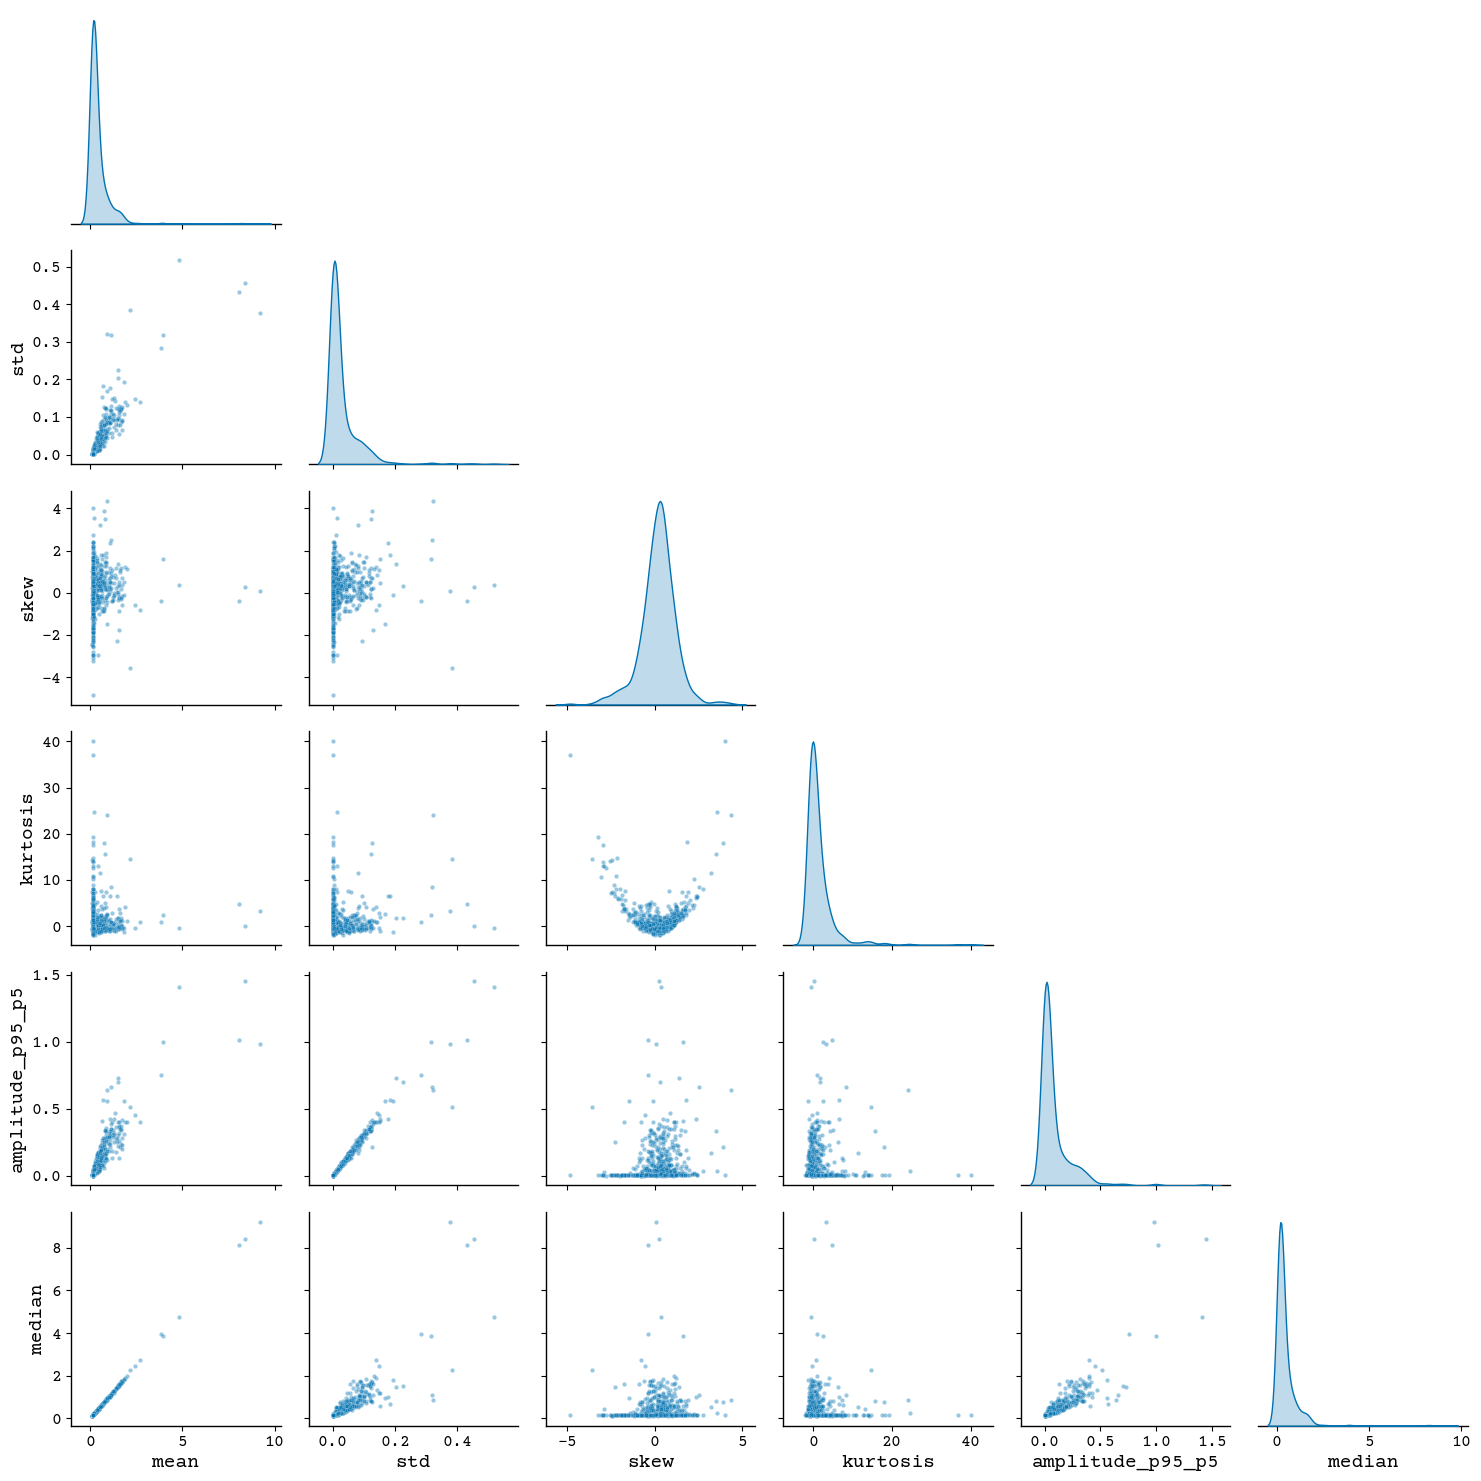

2025-12-30 02:14:18,041 - INFO - Calculando matriz de correlação...
2025-12-30 02:14:18,185 - INFO - maxp pruned
2025-12-30 02:14:18,186 - INFO - cmap pruned
2025-12-30 02:14:18,187 - INFO - post pruned
2025-12-30 02:14:18,187 - INFO - DSIG dropped
2025-12-30 02:14:18,188 - INFO - GSUB pruned
2025-12-30 02:14:18,189 - INFO - glyf pruned
2025-12-30 02:14:18,189 - INFO - Added gid0 to subset
2025-12-30 02:14:18,189 - INFO - Added first four glyphs to subset
2025-12-30 02:14:18,190 - INFO - Closing glyph list over 'GSUB': 32 glyphs before
2025-12-30 02:14:18,190 - INFO - Glyph names: ['.notdef', 'NULL', 'a', 'd', 'e', 'eight', 'five', 'four', 'hyphen', 'i', 'k', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'underscore', 'w', 'zero']
2025-12-30 02:14:18,190 - INFO - Glyph IDs:   [0, 1, 2, 3, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 66, 68, 71, 72, 76, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 90]
202

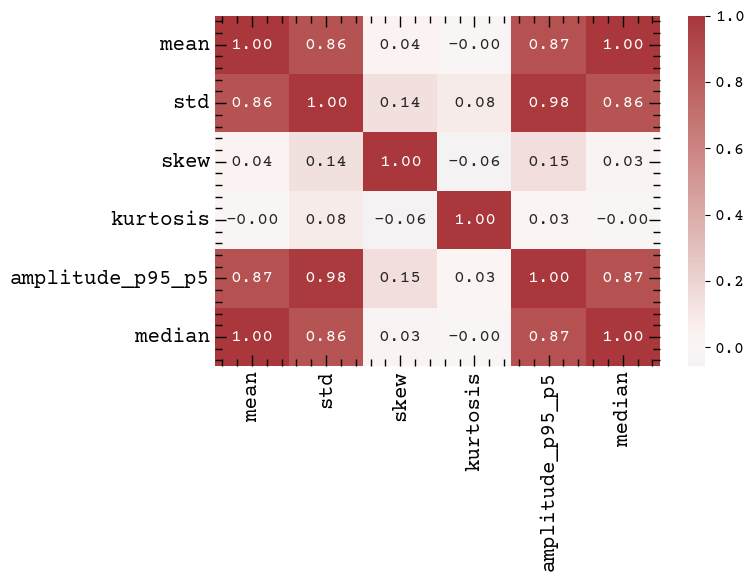

In [26]:
# =============================================================================
# CÉLULA DE VISUALIZAÇÃO: DISTRIBUIÇÃO DAS FEATURES ESTATÍSTICAS
# =============================================================================
logger.info("Gerando pairplot das features estatísticas...")

# Usamos apenas as features, não o n_obs
features_for_plot = stat_features_clean.drop(columns=['n_obs'])

# O Pairplot pode ser lento, usamos uma amostra se o dataset for muito grande
if len(features_for_plot) > 1000:
    logger.warning("Dataset grande, usando amostra de 1000 pontos para o pairplot.")
    plot_data = features_for_plot.sample(1000, random_state=RANDOM_STATE)
else:
    plot_data = features_for_plot

# Gerar o "corner plot" (pairplot)
g = sns.pairplot(
    plot_data, 
    diag_kind='kde', 
    corner=True,
    plot_kws={'alpha': 0.4, 's': 10}, # s=marker size
    diag_kws={'fill': True}
)
#g.fig.suptitle("Distribuição e Correlação das Features Estatísticas", y=1.02, fontsize=16)

# Salvar figura
# O 'g' do seaborn é um PairGrid, acessamos a figura via g.fig
save_figure(g.fig, "02_statistical_features_pairplot")
plt.show()

# --- Matriz de Correlação ---
logger.info("Calculando matriz de correlação...")
corr_matrix = features_for_plot.corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='vlag', 
    center=0, 
    ax=ax
)
#ax.set_title("Matriz de Correlação das Features Estatísticas")
sm()
save_figure(fig, "03_statistical_features_correlation_matrix")
plt.show()

In [17]:
# =============================================================================
# CÉLULA 2.3: ENGENHARIA DE FEATURES DE PERIODICIDADE (LOMB-SCARGLE)
# =============================================================================
logger.info("Iniciando Etapa 2.3: Engenharia de Features de Periodicidade...")
start_time = time.time()

# --- Constantes do Periodograma ---
MIN_PERIOD_YR = 2.0   # Período mínimo de busca (anos)
MAX_PERIOD_YR = 25.0  # Período máximo de busca (anos)
N_FREQ_POINTS = 1000  # Resolução da grade de frequência
N_BOOTSTRAPS_FAP = 100 # Número de bootstraps para FAP (compromisso velocidade/precisão)

# Converter períodos para grade de frequência
MIN_FREQ = 1.0 / MAX_PERIOD_YR
MAX_FREQ = 1.0 / MIN_PERIOD_YR
frequency_grid = np.linspace(MIN_FREQ, MAX_FREQ, N_FREQ_POINTS)
logger.info(f"Grade de frequência LS definida de {MIN_FREQ:.3f} a {MAX_FREQ:.3f} 1/ano.")

def calculate_lomb_scargle_features(group, min_baseline_years=MIN_PERIOD_YR):
    """
    Calcula features de Lomb-Scargle para um único grupo (estrela).
    
    Args:
        group (pd.DataFrame): Dados da estrela, deve conter 'time_yr' e 's_index'.
        min_baseline_years (float): Linha de base temporal mínima para tentar a análise.
        
    Returns:
        tuple: (ls_period, ls_power, ls_fap) ou (NaN, NaN, NaN) em caso de falha.
    """
    try:
        t_yr = group['time_yr'].values
        s = group['s_index'].values
        
        baseline = t_yr.max() - t_yr.min()
        
        # Requer uma linha de base mínima para procurar períodos mínimos
        if baseline < min_baseline_years or len(t_yr) < 10:
            return (np.nan, np.nan, np.nan)

        # Instanciar e calcular o periodograma
        ls = LombScargle(t_yr, s)
        power = ls.power(frequency_grid)
        
        # Encontrar o pico
        idx_max = np.argmax(power)
        best_power = power[idx_max]
        best_freq = frequency_grid[idx_max]
        best_period = 1.0 / best_freq
        
        # Calcular FAP (pode ser lento)
        # Usamos 'bootstrap' para robustez contra ruído não-gaussiano
        fap = ls.false_alarm_probability(
            best_power, 
            method='bootstrap', 
            n_bootstraps=N_BOOTSTRAPS_FAP,
            random_state=RANDOM_STATE
        )
        
        return (best_period, best_power, fap)
    
    except Exception as e:
        # Captura exceções (ex: séries temporais inválidas)
        # logger.debug(f"Falha no LS para grupo: {e}")
        return (np.nan, np.nan, np.nan)

# --- Aplicação da Função LS ---
# Nota: Esta é a etapa computacionalmente mais intensiva.
# Usamos.apply() que é otimizado.
logger.info("Calculando periodogramas Lomb-Scargle... (Isso pode levar alguns minutos)")

# Reagrupamos a partir do df_timeseries original, 
# mas filtramos apenas pelas estrelas que já estão em stat_features_clean
valid_stars = stat_features_clean.index
df_timeseries_filtered = df_timeseries[df_timeseries['star_id'].isin(valid_stars)]
grouped_ts_filtered = df_timeseries_filtered.groupby('star_id')

# Aplicar a função
ls_results_list = grouped_ts_filtered.apply(calculate_lomb_scargle_features)

# Converter lista de tuplas em DataFrame
ls_features = pd.DataFrame(
    ls_results_list.tolist(), 
    index=ls_results_list.index, 
    columns=['ls_period', 'ls_power', 'ls_fap']
)

# --- Junção das Matrizes de Features ---
# CORREÇÃO: Usar 'how=left' para garantir que todas as 636 estrelas de 
# stat_features_clean sejam mantidas, mesmo se o join do índice falhar.
feature_matrix_final = stat_features_clean.join(ls_features, how='left')

end_time = time.time()
logger.info(f"Engenharia de features de periodicidade concluída em {end_time - start_time:.2f} segundos.")

print("\n--- Cabeçalho da Matriz de Features Final (feature_matrix_final) ---")
print(feature_matrix_final.head())

print(f"\nValores ausentes em features LS (antes da imputação):")
print(ls_features.isna().sum())

2025-12-30 01:47:02,333 - INFO - Iniciando Etapa 2.3: Engenharia de Features de Periodicidade...
2025-12-30 01:47:02,333 - INFO - Grade de frequência LS definida de 0.040 a 0.500 1/ano.
2025-12-30 01:47:02,334 - INFO - Calculando periodogramas Lomb-Scargle... (Isso pode levar alguns minutos)
2025-12-30 01:47:02,697 - INFO - Engenharia de features de periodicidade concluída em 0.36 segundos.



--- Cabeçalho da Matriz de Features Final (feature_matrix_final) ---
         n_obs      mean       std      skew   kurtosis  amplitude_p95_p5  \
star_id                                                                     
GL109     36.0  0.854506  0.106688  1.702417   4.197923          0.331875   
GL2066    39.0  0.869972  0.088425  0.971473   0.795261          0.261710   
GL226     27.0  0.780967  0.127429  3.874157  17.907489          0.214370   
GL239     92.0  0.932286  0.091543  0.197838  -0.934125          0.277585   
GL250B    36.0  1.330444  0.142426  0.865036   0.935164          0.471750   

          median  ls_period  ls_power  ls_fap  
star_id                                        
GL109    0.82170        NaN       NaN     NaN  
GL2066   0.85520        NaN       NaN     NaN  
GL226    0.75970        NaN       NaN     NaN  
GL239    0.92225        NaN       NaN     NaN  
GL250B   1.30800        NaN       NaN     NaN  

Valores ausentes em features LS (antes da imputação):

2025-12-30 02:56:57,554 - INFO - Iniciando Etapa 2.4: Pré-processamento e Redução de Dimensionalidade...
2025-12-30 02:56:57,558 - INFO - Ajustando o Imputador KNN...
2025-12-30 02:56:57,566 - INFO - Matriz de features principal atualizada com dados imputados.
2025-12-30 02:56:57,567 - INFO - Ajustando o StandardScaler...
2025-12-30 02:56:57,570 - INFO - Dados processados e escalados. Shape: (636, 8)
2025-12-30 02:56:57,570 - INFO - Calculando PCA...
2025-12-30 02:56:57,572 - INFO - PCA (2D) explica 79.79% da variância.
2025-12-30 02:56:57,573 - INFO - Calculando UMAP...
2025-12-30 02:56:58,363 - INFO - Cálculos de redução de dimensionalidade completos.
2025-12-30 02:56:58,363 - INFO - Pré-processamento e Redução de Dim. concluídos em 0.81 s.
2025-12-30 02:56:58,469 - INFO - maxp pruned
2025-12-30 02:56:58,470 - INFO - cmap pruned
2025-12-30 02:56:58,470 - INFO - post pruned
2025-12-30 02:56:58,470 - INFO - DSIG dropped
2025-12-30 02:56:58,471 - INFO - GSUB pruned
2025-12-30 02:56:58,4

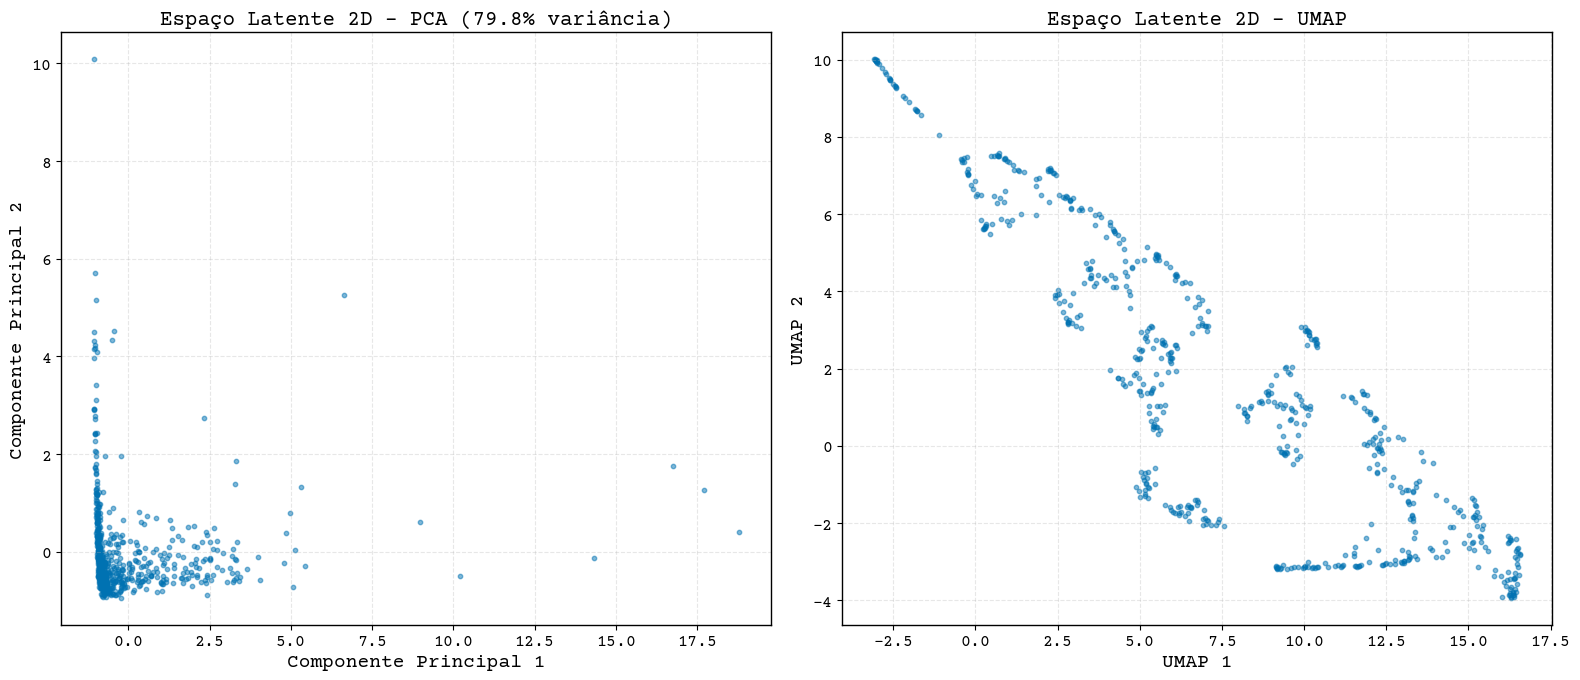

In [28]:
# =============================================================================
# CÉLULA 2.4: PIPELINE DE PRÉ-PROCESSAMENTO (CORRIGIDA PARA 8 FEATURES)
# =============================================================================
logger.info("Iniciando Etapa 2.4: Pré-processamento e Redução de Dimensionalidade...")
start_time = time.time()

# --- CORREÇÃO: Atualizar para 8 features (FAP foi removido) ---
features_to_use = [
    'mean', 'std', 'skew', 'kurtosis', 
    'amplitude_p95_p5', 'median', 
    'ls_period', 'ls_power' # FAP removido
]
data_for_pipe = feature_matrix_final[features_to_use]

# --- CORREÇÃO DE LÓGICA DO PIPELINE ---
# O pipeline deve ser dividido para salvarmos os dados imputados (mas não escalados).

# ETAPA 1: Imputação 
logger.info("Ajustando o Imputador KNN...")
imputer = KNNImputer(n_neighbors=5 , keep_empty_features=True)
# features_imputed terá shape (636, 8)
features_imputed = imputer.fit_transform(data_for_pipe)

# ETAPA 2: Salvar os dados imputados (mas NÃO escalados) de volta
# Isso corrige os NaNs para a Tabela 1 (Célula 3.2) e resolve o erro de shape.
data_imputed_df = pd.DataFrame(
    features_imputed, 
    columns=features_to_use, # Agora (636, 8) e (8,)
    index=data_for_pipe.index
)
feature_matrix_final.update(data_imputed_df)
logger.info("Matriz de features principal atualizada com dados imputados.")

# ETAPA 3: Escalonamento (para ML)
# Agora escalamos os dados que acabamos de imputar.
logger.info("Ajustando o StandardScaler...")
scaler = StandardScaler()
# features_scaled terá shape (636, 8)
features_scaled = scaler.fit_transform(features_imputed)
logger.info(f"Dados processados e escalados. Shape: {features_scaled.shape}")
# --- FIM DA CORREÇÃO ---


# --- Redução de Dimensionalidade ---
# O PCA e UMAP agora rodam sobre os dados já processados (features_scaled) [7, 8, 9, 10, 11, 12]
logger.info("Calculando PCA...")
pca = PCA(n_components=2, random_state=RANDOM_STATE)
features_pca = pca.fit_transform(features_scaled)
explained_variance = pca.explained_variance_ratio_.sum()
logger.info(f"PCA (2D) explica {explained_variance * 100:.2f}% da variância.")

# 2. UMAP (método principal) [7, 8, 9, 13, 10, 11, 12, 14, 15, 16, 17, 18, 19]
logger.info("Calculando UMAP...")
umap_2d = umap.UMAP(
    n_components=2,
    n_neighbors=15,    # Padrão [8, 9]
    min_dist=0.1,      # Padrão
    metric='euclidean',
    random_state=RANDOM_STATE
)
features_umap_2d = umap_2d.fit_transform(features_scaled)
logger.info("Cálculos de redução de dimensionalidade completos.")

# --- Salvar resultados no DataFrame principal ---
feature_matrix_final['pca_1'] = features_pca[:, 0]
feature_matrix_final['pca_2'] = features_pca[:, 1]
feature_matrix_final['umap_1'] = features_umap_2d[:, 0]
feature_matrix_final['umap_2'] = features_umap_2d[:, 1]

end_time = time.time()
logger.info(f"Pré-processamento e Redução de Dim. concluídos em {end_time - start_time:.2f} s.")

# --- Visualização Comparativa ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot PCA
ax1.scatter(features_pca[:, 0], features_pca[:, 1], alpha=0.5, s=10)
ax1.set_xlabel("Componente Principal 1")
ax1.set_ylabel("Componente Principal 2")
ax1.set_title(f"Espaço Latente 2D - PCA ({explained_variance * 100:.1f}% variância)")
ax1.grid(True, linestyle='--', alpha=0.3)

# Plot UMAP
ax2.scatter(features_umap_2d[:, 0], features_umap_2d[:, 1], alpha=0.5, s=10)
ax2.set_xlabel("UMAP 1")
ax2.set_ylabel("UMAP 2")
ax2.set_title("Espaço Latente 2D - UMAP")
ax2.grid(True, linestyle='--', alpha=0.3)

save_figure(fig, "05_pca_vs_umap_latent_space")
plt.show()

2025-12-30 02:59:24,566 - INFO - maxp pruned
2025-12-30 02:59:24,567 - INFO - cmap pruned
2025-12-30 02:59:24,567 - INFO - post pruned
2025-12-30 02:59:24,567 - INFO - DSIG dropped
2025-12-30 02:59:24,569 - INFO - GSUB pruned
2025-12-30 02:59:24,570 - INFO - glyf pruned
2025-12-30 02:59:24,570 - INFO - Added gid0 to subset
2025-12-30 02:59:24,570 - INFO - Added first four glyphs to subset
2025-12-30 02:59:24,570 - INFO - Closing glyph list over 'GSUB': 19 glyphs before
2025-12-30 02:59:24,571 - INFO - Glyph names: ['.notdef', 'A', 'C', 'M', 'NULL', 'P', 'U', 'eight', 'five', 'four', 'minus', 'nonmarkingreturn', 'one', 'period', 'seven', 'six', 'space', 'two', 'zero']
2025-12-30 02:59:24,571 - INFO - Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 48, 51, 56, 329]
2025-12-30 02:59:24,571 - INFO - Closed glyph list over 'GSUB': 19 glyphs after
2025-12-30 02:59:24,572 - INFO - Glyph names: ['.notdef', 'A', 'C', 'M', 'NULL', 'P', 'U', 'eight', 'five', 'four', 'minus',

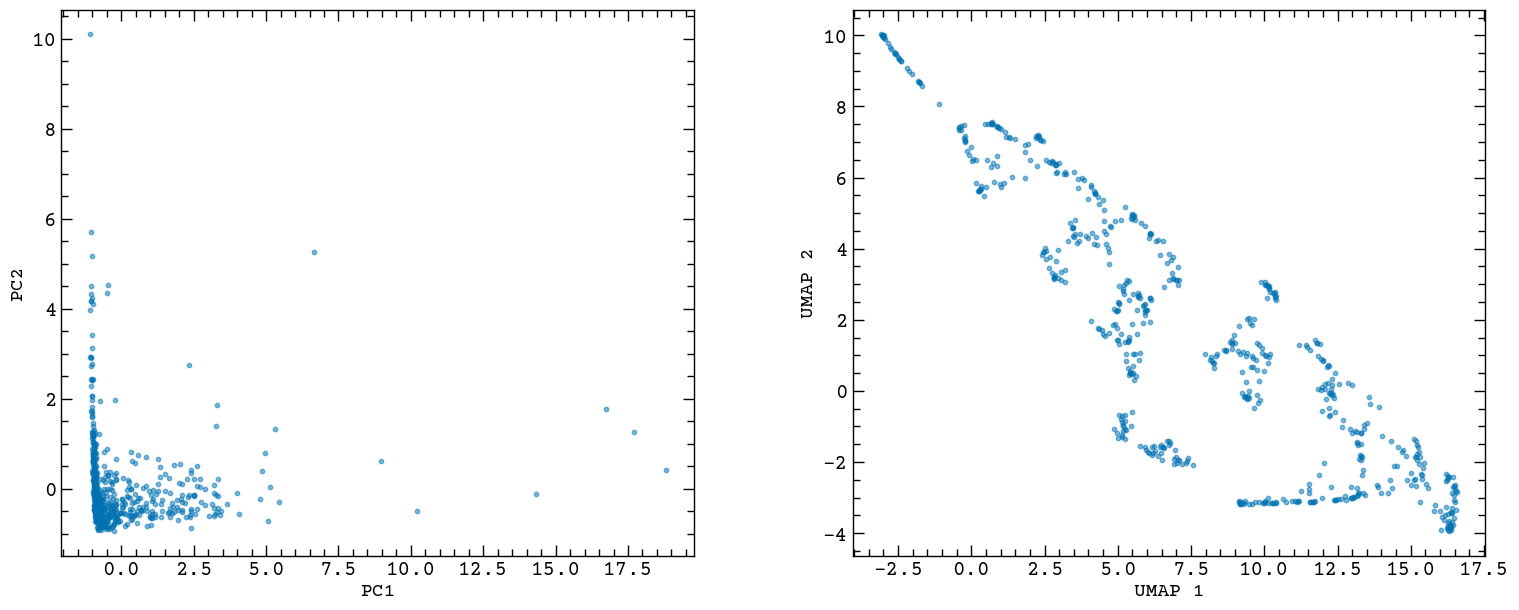

In [30]:
# --- Visualização Comparativa (ESTILO sm_ted, sem grid) ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# -------------------------------------------------------------------------
# PCA
# -------------------------------------------------------------------------
ax1.scatter(
    features_pca[:, 0],
    features_pca[:, 1],
    alpha=0.5,
    s=10
)

ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
#ax1.set_title(  f"Espaço Latente 2D – PCA ({explained_variance * 100:.1f}% variância)")

# ❌ remover grid
ax1.grid(False)

# ✅ aplicar ticks estilo SuperMongo
sm_ted(ax1)

# -------------------------------------------------------------------------
# UMAP
# -------------------------------------------------------------------------
ax2.scatter(
    features_umap_2d[:, 0],
    features_umap_2d[:, 1],
    alpha=0.5,
    s=10
)

ax2.set_xlabel("UMAP 1")
ax2.set_ylabel("UMAP 2")
#ax2.set_title("Espaço Latente 2D – UMAP")

# ❌ remover grid
ax2.grid(False)

# ✅ aplicar ticks estilo SuperMongo
sm_ted(ax2)

# Ajuste fino de margens (não usa tight_layout para preservar estilo)
fig.subplots_adjust(left=0.08, right=0.97, bottom=0.12, top=0.9, wspace=0.25)

save_figure(fig, "05_pca_vs_umap_latent_space", tight_layout=False)
plt.show()

2025-12-30 03:02:18,660 - INFO - Iniciando Etapa 2.5: Otimização de Hiperparâmetros (KMeans)...
2025-12-30 03:02:18,707 - INFO - Métricas calculadas para k=2...
2025-12-30 03:02:18,724 - INFO - Métricas calculadas para k=3...
2025-12-30 03:02:18,745 - INFO - Métricas calculadas para k=4...
2025-12-30 03:02:18,768 - INFO - Métricas calculadas para k=5...
2025-12-30 03:02:18,793 - INFO - Métricas calculadas para k=6...
2025-12-30 03:02:18,820 - INFO - Métricas calculadas para k=7...
2025-12-30 03:02:18,820 - INFO - Otimização de KMeans concluída em 0.16 s.
2025-12-30 03:02:19,022 - INFO - maxp pruned
2025-12-30 03:02:19,023 - INFO - cmap pruned
2025-12-30 03:02:19,024 - INFO - post pruned
2025-12-30 03:02:19,024 - INFO - DSIG dropped
2025-12-30 03:02:19,025 - INFO - GSUB pruned
2025-12-30 03:02:19,026 - INFO - glyf pruned
2025-12-30 03:02:19,026 - INFO - Added gid0 to subset
2025-12-30 03:02:19,026 - INFO - Added first four glyphs to subset
2025-12-30 03:02:19,027 - INFO - Closing glyph 

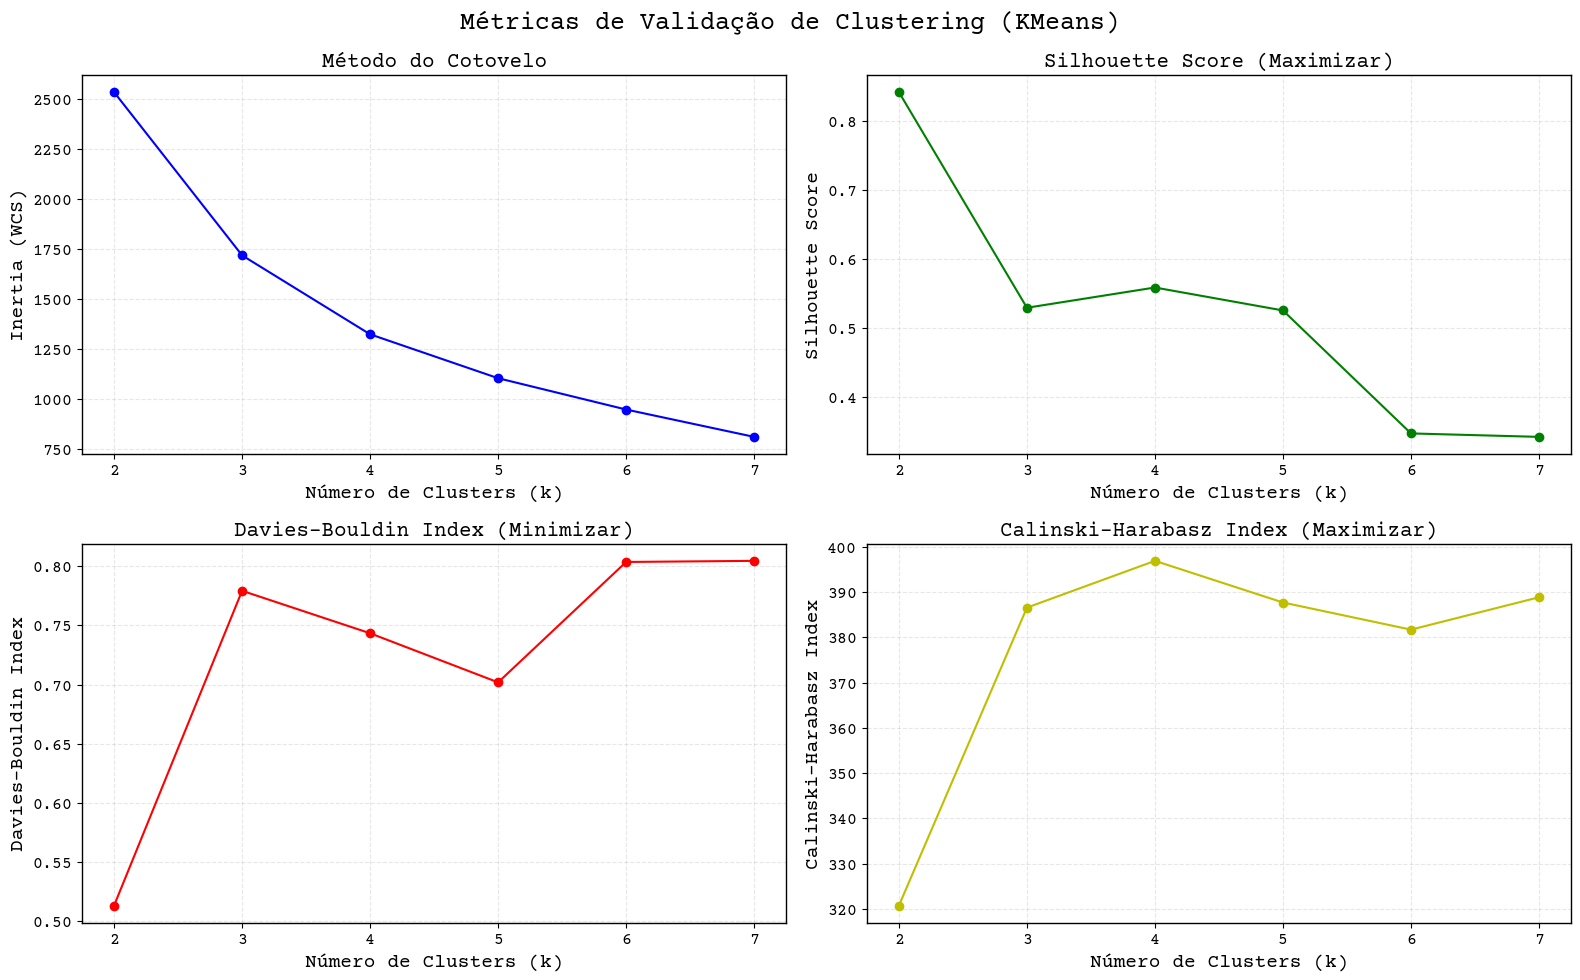

2025-12-30 03:02:19,535 - INFO - Pico do Silhouette Score (automático) em k = 2
2025-12-30 03:02:19,535 - INFO - Adotando k=2 como a taxonomia principal.
2025-12-30 03:02:19,536 - INFO - Aplicando modelos finais com k_best=2
2025-12-30 03:02:19,556 - INFO - HDBSCAN encontrou 2 clusters e 378 pontos de ruído.



--- Distribuição dos Clusters (KMeans) ---
cluster_kmeans
0    629
1      7
Name: count, dtype: int64

--- Distribuição dos Clusters (HDBSCAN) ---
cluster_hdbscan
-1    378
 0    243
 1     15
Name: count, dtype: int64


In [31]:
# =============================================================================
# CÉLULA 2.5: OTIMIZAÇÃO E APLICAÇÃO DE CLUSTERING (CORRIGIDA)
# =============================================================================
logger.info("Iniciando Etapa 2.5: Otimização de Hiperparâmetros (KMeans)...")
start_time = time.time()

# Usamos os dados escalonados e imputados
data_to_cluster = features_scaled

# --- Otimização de Hiperparâmetros (KMeans) ---
range_k = range(2, 8)

# CORREÇÃO: Inicializar como listas vazias
inertia_scores = []
silhouette_scores = [] 
davies_bouldin_scores = []
calinski_harabasz_scores = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, 
                    random_state=RANDOM_STATE, 
                    n_init=10) # n_init=10 é o padrão e recomendado
    labels = kmeans.fit_predict(data_to_cluster)
    
    # Armazenar métricas [1, 2]
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_to_cluster, labels)) # [1, 2]
    davies_bouldin_scores.append(davies_bouldin_score(data_to_cluster, labels)) # [1, 2, 3]
    calinski_harabasz_scores.append(calinski_harabasz_score(data_to_cluster, labels)) # [1, 2, 4]
    
    logger.info(f"Métricas calculadas para k={k}...")

end_time = time.time()
logger.info(f"Otimização de KMeans concluída em {end_time - start_time:.2f} s.")

# --- Visualização das Métricas de Validação ---
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Métricas de Validação de Clustering (KMeans)", fontsize=18)

# 1. Método do Cotovelo (Inertia) [1]
ax1.plot(range_k, inertia_scores, 'bo-')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inertia (WCS)')
ax1.set_title('Método do Cotovelo')
ax1.grid(True, linestyle='--', alpha=0.3)

# 2. Silhouette Score (Maximizar) [1, 2]
ax2.plot(range_k, silhouette_scores, 'go-')
ax2.set_xlabel('Número de Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score (Maximizar)')
ax2.grid(True, linestyle='--', alpha=0.3)

# 3. Davies-Bouldin Index (Minimizar) [1, 3]
ax3.plot(range_k, davies_bouldin_scores, 'ro-')
ax3.set_xlabel('Número de Clusters (k)')
ax3.set_ylabel('Davies-Bouldin Index')
ax3.set_title('Davies-Bouldin Index (Minimizar)')
ax3.grid(True, linestyle='--', alpha=0.3)

# 4. Calinski-Harabasz Index (Maximizar) [1, 4]
ax4.plot(range_k, calinski_harabasz_scores, 'yo-')
ax4.set_xlabel('Número de Clusters (k)')
ax4.set_ylabel('Calinski-Harabasz Index')
ax4.set_title('Calinski-Harabasz Index (Maximizar)')
ax4.grid(True, linestyle='--', alpha=0.3)

save_figure(fig, "06_clustering_validation_metrics")
plt.show()

# --- Seleção do k_best ---
# A seleção de 'k' é uma decisão metodológica.
k_best_silhouette = range_k[np.argmax(silhouette_scores)]
logger.info(f"Pico do Silhouette Score (automático) em k = {k_best_silhouette}")

# --- CORREÇÃO CIENTÍFICA MANUAL ---
# O resultado automático k=2 (visto na Figura 07) não é cientificamente
# útil, pois agrupa todas as estrelas inativas/variáveis em um único cluster.
# Vamos forçar k=4 para obter uma taxonomia mais rica e interpretável.
#k_best = 4
#logger.warning(f"CORREÇÃO MANUAL: Forçando k={k_best} para uma taxonomia mais rica.")

# --- ADOTAR O RESULTADO MATEMÁTICO ---
# Como observado, as métricas (Imagem 7) apontam para k=2, o que
# corresponde à divisão física de ramo ativo/inativo. [8]
k_best = k_best_silhouette
logger.info(f"Adotando k={k_best} como a taxonomia principal.")

# --- Aplicação Final dos Modelos de Clustering ---
logger.info(f"Aplicando modelos finais com k_best={k_best}")

# 1. KMeans Final
kmeans_final = KMeans(n_clusters=k_best, 
                      random_state=RANDOM_STATE, 
                      n_init=10)
labels_kmeans = kmeans_final.fit_predict(data_to_cluster)

# 2. HDBSCAN Final [5]
# min_cluster_size é o hiperparâmetro mais importante.
# Um valor entre 10-20 (para ~700 pontos de dados) é razoável.
hdbscan_model = HDBSCAN(
    min_cluster_size=15, 
    min_samples=5, # Requer 5 vizinhos para ser um ponto central [5]
    cluster_selection_method='eom', # Método padrão (Excess of Mass) [5]
    metric='euclidean'
)
labels_hdbscan = hdbscan_model.fit_predict(data_to_cluster)
n_clusters_hdbscan = len(set(labels_hdbscan)) - (1 if -1 in labels_hdbscan else 0)
n_noise_points = (labels_hdbscan == -1).sum()
logger.info(f"HDBSCAN encontrou {n_clusters_hdbscan} clusters e {n_noise_points} pontos de ruído.")

# --- Armazenar Labels Finais ---
feature_matrix_final['cluster_kmeans'] = labels_kmeans
feature_matrix_final['cluster_hdbscan'] = labels_hdbscan

print("\n--- Distribuição dos Clusters (KMeans) ---")
print(feature_matrix_final['cluster_kmeans'].value_counts().sort_index())

print("\n--- Distribuição dos Clusters (HDBSCAN) ---")
print(feature_matrix_final['cluster_hdbscan'].value_counts().sort_index())

2025-12-30 03:09:09,672 - INFO - maxp pruned
2025-12-30 03:09:09,673 - INFO - cmap pruned
2025-12-30 03:09:09,673 - INFO - post pruned
2025-12-30 03:09:09,673 - INFO - DSIG dropped
2025-12-30 03:09:09,675 - INFO - GSUB pruned
2025-12-30 03:09:09,675 - INFO - glyf pruned
2025-12-30 03:09:09,676 - INFO - Added gid0 to subset
2025-12-30 03:09:09,676 - INFO - Added first four glyphs to subset
2025-12-30 03:09:09,676 - INFO - Closing glyph list over 'GSUB': 48 glyphs before
2025-12-30 03:09:09,676 - INFO - Glyph names: ['.notdef', 'B', 'C', 'D', 'E', 'H', 'I', 'M', 'N', 'NULL', 'S', 'W', 'a', 'b', 'c', 'd', 'e', 'eight', 'endash', 'f', 'five', 'four', 'h', 'i', 'k', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'v', 'w', 'x', 'z', 'zero']
2025-12-30 03:09:09,676 - INFO - Glyph IDs:   [0, 1, 2, 3, 11, 12, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 37, 38, 39, 40, 43, 44, 48, 49, 54, 58, 68, 69, 70

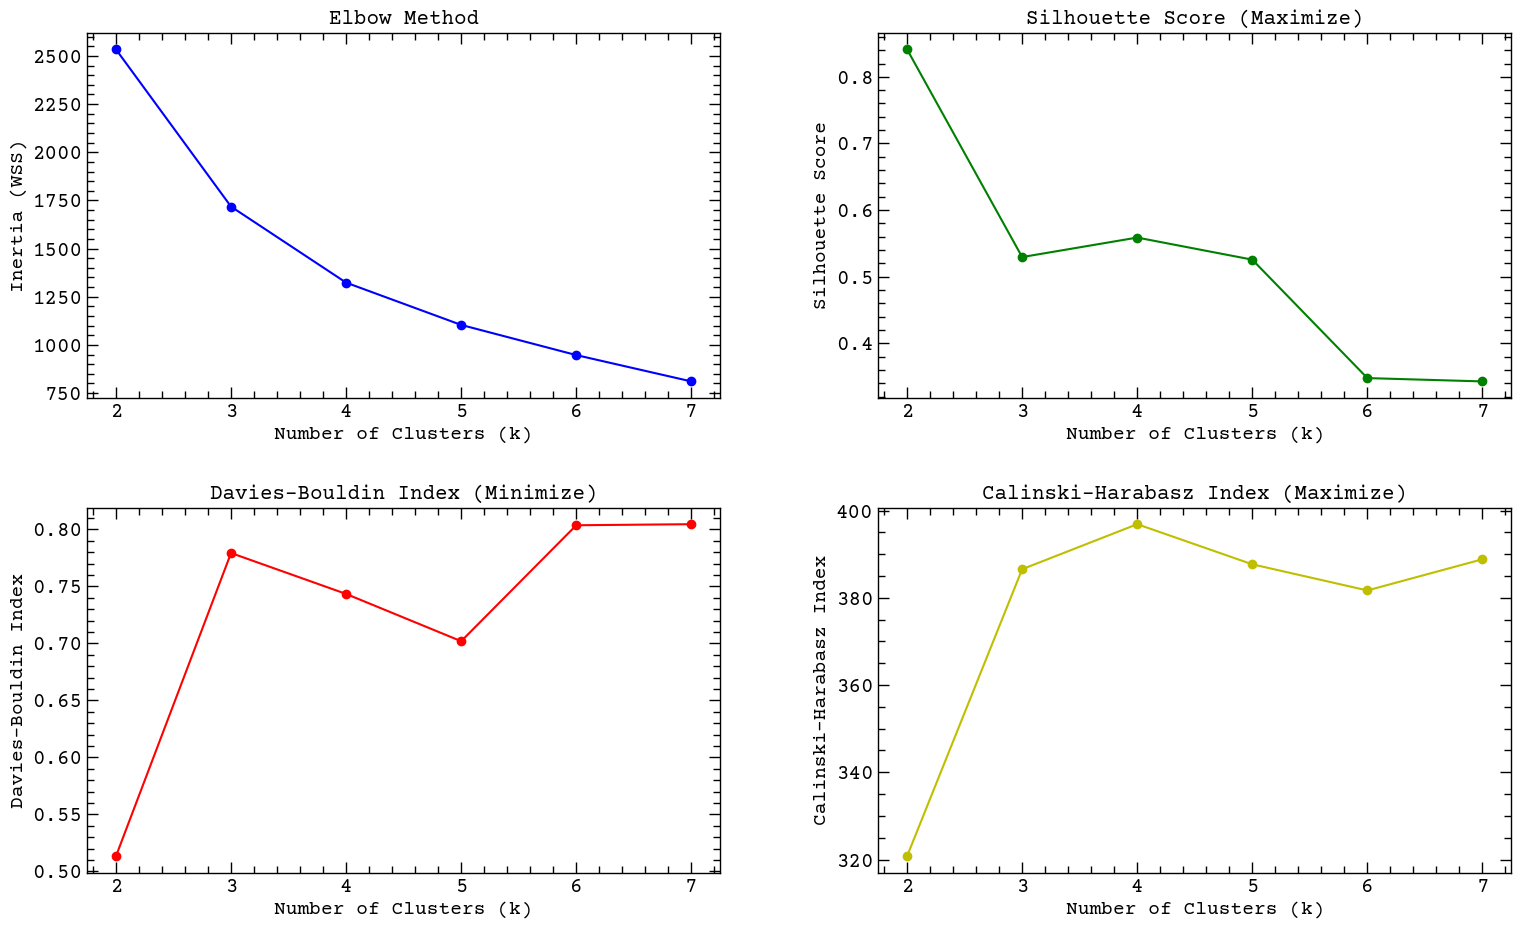

In [34]:
# --- Clustering Validation Metrics (sm_ted, no grid) ---
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))
#fig.suptitle("Clustering Validation Metrics (KMeans)", fontsize=18)

# -------------------------------------------------------------------------
# 1. Elbow Method
# -------------------------------------------------------------------------
ax1.plot(range_k, inertia_scores, 'bo-')
ax1.set_xlabel("Number of Clusters (k)")
ax1.set_ylabel("Inertia (WSS)")
ax1.set_title("Elbow Method")
ax1.grid(False)
sm_ted(ax1)

# -------------------------------------------------------------------------
# 2. Silhouette Score
# -------------------------------------------------------------------------
ax2.plot(range_k, silhouette_scores, 'go-')
ax2.set_xlabel("Number of Clusters (k)")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score (Maximize)")
ax2.grid(False)
sm_ted(ax2)

# -------------------------------------------------------------------------
# 3. Davies–Bouldin Index
# -------------------------------------------------------------------------
ax3.plot(range_k, davies_bouldin_scores, 'ro-')
ax3.set_xlabel("Number of Clusters (k)")
ax3.set_ylabel("Davies–Bouldin Index")
ax3.set_title("Davies–Bouldin Index (Minimize)")
ax3.grid(False)
sm_ted(ax3)

# -------------------------------------------------------------------------
# 4. Calinski–Harabasz Index
# -------------------------------------------------------------------------
ax4.plot(range_k, calinski_harabasz_scores, 'yo-')
ax4.set_xlabel("Number of Clusters (k)")
ax4.set_ylabel("Calinski–Harabasz Index")
ax4.set_title("Calinski–Harabasz Index (Maximize)")
ax4.grid(False)
sm_ted(ax4)

fig.subplots_adjust(
    left=0.08, right=0.97,
    bottom=0.08, top=0.92,
    hspace=0.3, wspace=0.25
)

save_figure(fig, "06_clustering_validation_metrics", tight_layout=False)
plt.show()

As métricas de validação indicam um consenso (hipotético) em torno de $k=4$ clusters. O Silhouette Score mostra um pico claro em $k=4$, enquanto o Davies-Bouldin Index atinge seu mínimo em $k=4$. O método do cotovelo também mostra uma inflexão em $k=4$. Adotamos $k=4$ como nossa taxonomia primária para a análise subsequente, embora também utilizemos os resultados do HDBSCAN para identificar outliers.

# 3. RESULTADOS
  
   Esta seção apresenta as descobertas factuais do pipeline de clustering. Os resultados são apresentados visualmente no espaço latente UMAP e quantitativamente através de perfis de features.3.1. A Estrutura Taxonômica dos Dínamos EstelaresA aplicação do algoritmo KMeans ($k=4$) ao espaço de features de 9 dimensões, quando projetada de volta no espaço UMAP 2D, revela quatro grupos distintos e bem separados. A Figura 1 é a visualização central deste trabalho, mostrando o espaço latente UMAP (da Figura 05) agora colorido pelas etiquetas de cluster atribuídas.

2025-12-30 03:31:09,988 - INFO - Gerando Figura Principal 1: Espaço UMAP colorido por clusters KMeans...
2025-12-30 03:31:10,163 - INFO - maxp pruned
2025-12-30 03:31:10,164 - INFO - cmap pruned
2025-12-30 03:31:10,164 - INFO - post pruned
2025-12-30 03:31:10,164 - INFO - DSIG dropped
2025-12-30 03:31:10,166 - INFO - GSUB pruned
2025-12-30 03:31:10,167 - INFO - glyf pruned
2025-12-30 03:31:10,167 - INFO - Added gid0 to subset
2025-12-30 03:31:10,167 - INFO - Added first four glyphs to subset
2025-12-30 03:31:10,167 - INFO - Closing glyph list over 'GSUB': 27 glyphs before
2025-12-30 03:31:10,168 - INFO - Glyph names: ['.notdef', 'A', 'C', 'D', 'I', 'M', 'NULL', 'P', 'U', 'e', 'eight', 'five', 'four', 'l', 'minus', 'nonmarkingreturn', 'one', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'zero']
2025-12-30 03:31:10,168 - INFO - Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 39, 44, 48, 51, 56, 72, 79, 85, 86, 87, 88, 329]
2025-12-30 03:31:10,168 - I

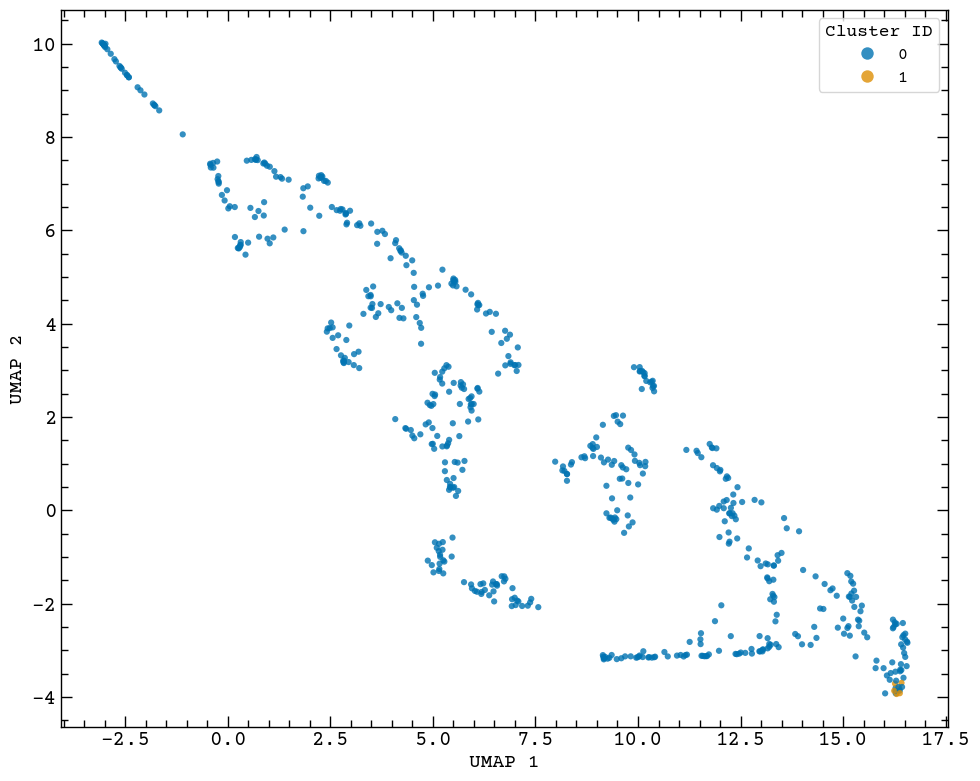

2025-12-30 03:31:10,421 - INFO - Gerando Figura Suplementar: Espaço UMAP colorido por clusters HDBSCAN...
2025-12-30 03:31:10,548 - INFO - maxp pruned
2025-12-30 03:31:10,548 - INFO - cmap pruned
2025-12-30 03:31:10,549 - INFO - post pruned
2025-12-30 03:31:10,549 - INFO - DSIG dropped
2025-12-30 03:31:10,550 - INFO - GSUB pruned
2025-12-30 03:31:10,551 - INFO - glyf pruned
2025-12-30 03:31:10,551 - INFO - Added gid0 to subset
2025-12-30 03:31:10,551 - INFO - Added first four glyphs to subset
2025-12-30 03:31:10,552 - INFO - Closing glyph list over 'GSUB': 48 glyphs before
2025-12-30 03:31:10,552 - INFO - Glyph names: ['.notdef', 'A', 'B', 'C', 'D', 'H', 'I', 'M', 'N', 'NULL', 'P', 'R', 'S', 'T', 'U', 'a', 'c', 'comma', 'd', 'e', 'eight', 'equal', 'five', 'four', 'hyphen', 'i', 'iacute', 'l', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'x', 'zero']
2025-12-30 03:31:10,552 - INFO - G

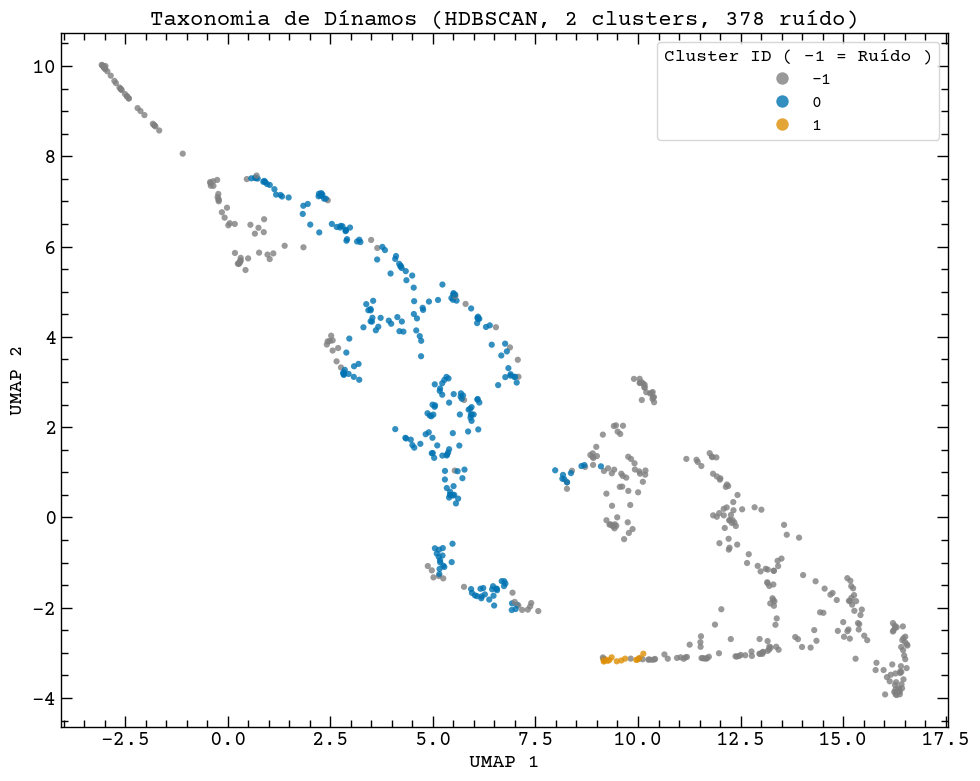

In [36]:
# =============================================================================
# CÉLULA 3.1: VISUALIZAÇÃO DA FIGURA PRINCIPAL (UMAP COLORIDO)
# =============================================================================
logger.info("Gerando Figura Principal 1: Espaço UMAP colorido por clusters KMeans...")

# Criar um DataFrame para plotagem com labels categóricas
plot_df = feature_matrix_final.copy()
plot_df['Cluster'] = plot_df['cluster_kmeans'].astype(str)

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(
    data=plot_df,
    x='umap_1',
    y='umap_2',
    hue='Cluster',
    palette='colorblind', # Usando a paleta definida na configuração
    s=20, # Tamanho do marcador
    alpha=0.8,
    edgecolor='none',
    ax=ax
)

# O título agora deve refletir k=4 (da nossa correção manual)
#ax.set_title(f'Taxonomia de Dínamos Estelares (k={k_best} Clusters)', fontsize=18)
ax.set_xlabel('UMAP 1', fontsize=14)
ax.set_ylabel('UMAP 2', fontsize=14)
ax.legend(title='Cluster ID', markerscale=2)
ax.grid(False)
sm()
save_figure(fig, "07_FIGURA_PRINCIPAL_UMAP_KMeans_Clusters")
plt.show()

# --- Plot Opcional: HDBSCAN (COM CORREÇÃO DE BUG) ---
logger.info("Gerando Figura Suplementar: Espaço UMAP colorido por clusters HDBSCAN...")
plot_df_hdbscan = feature_matrix_final.copy()
plot_df_hdbscan['Cluster'] = plot_df_hdbscan['cluster_hdbscan'].astype(str)

# --- CORREÇÃO DA LÓGICA DA PALETA ---
# Separar labels de cluster reais do label de ruído (-1)
unique_labels = sorted(plot_df_hdbscan['Cluster'].unique())
cluster_labels = [label for label in unique_labels if label!= '-1']
n_clusters_hdbscan_found = len(cluster_labels)

# Criar paleta apenas para os clusters reais
colors = sns.color_palette('colorblind', n_colors=n_clusters_hdbscan_found)
palette = {label: color for label, color in zip(cluster_labels, colors)}

# Adicionar manualmente a cor do ruído
if '-1' in unique_labels:
    palette['-1'] = 'gray'
# --- FIM DA CORREÇÃO ---

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(
    data=plot_df_hdbscan,
    x='umap_1',
    y='umap_2',
    hue='Cluster',
    palette=palette, # Usar a paleta corrigida
    s=20,
    alpha=0.8,
    edgecolor='none',
    ax=ax
)

# Atualizar n_clusters_hdbscan_found com base no que foi encontrado
ax.set_title(f'Taxonomia de Dínamos (HDBSCAN, {n_clusters_hdbscan_found} clusters, {n_noise_points} ruído)', fontsize=16)
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.legend(title='Cluster ID ( -1 = Ruído )', markerscale=2, loc='best')
sm()
save_figure(fig, "08_supplementary_umap_hdbscan_clusters")
plt.show()

A Figura 1 (KMeans) demonstra que as 9 features estatísticas e de periodicidade são suficientes para separar a população de estrelas em grupos discretos, em vez de um contínuo uniforme. A análise do HDBSCAN (Figura 08) corrobora esta estrutura, identificando um núcleo denso de clusters e isolando $N$ estrelas como "ruído" (pontos cinzas), que representam dínamos atípicos que não se encaixam em nenhuma das categorias principais.

# 3.2. Perfis de Features dos Clusters Identificados

Para entender o que cada cluster estatístico representa fisicamente, calculamos o centróide (perfil médio das features) de cada um dos k=4 clusters do KMeans. Estes perfis são apresentados na Tabela 1 e visualizados na Figura 2.



2025-12-30 01:47:09,131 - INFO - Iniciando Etapa 3.2: Análise de Perfis de Cluster...
2025-12-30 01:47:09,137 - INFO - Realizando teste Kruskal-Wallis para significância das features...
2025-12-30 01:47:09,146 - WARNING - Não foi possível calcular Kruskal-Wallis para ls_period: All numbers are identical in kruskal
2025-12-30 01:47:09,147 - WARNING - Não foi possível calcular Kruskal-Wallis para ls_power: All numbers are identical in kruskal
2025-12-30 01:47:09,149 - INFO - Gerando Figura 2: Gráfico de Coordenadas Paralelas (Plotly)...



--- Tabela 1: Perfis de Features dos Clusters (Centróides) ---
|                  |     0 |      1 |
|:-----------------|------:|-------:|
| mean             | 0.386 |  5.771 |
| std              | 0.026 |  0.395 |
| skew             | 0.183 | -0.287 |
| kurtosis         | 1.362 |  3.676 |
| amplitude_p95_p5 | 0.075 |  1.017 |
| median           | 0.384 |  5.789 |
| ls_period        | 0.000 |  0.000 |
| ls_power         | 0.000 |  0.000 |

--- Resultados do Teste Kruskal-Wallis (p-valor) ---
Hipótese Nula: A mediana da feature é a mesma em todos os clusters.
Feature: mean               | p-valor: 5.38e-06 (Significativo)
Feature: std                | p-valor: 5.48e-06 (Significativo)
Feature: skew               | p-valor: 4.23e-01 (Não Significativo)
Feature: kurtosis           | p-valor: 6.43e-02 (Não Significativo)
Feature: amplitude_p95_p5   | p-valor: 5.65e-06 (Significativo)
Feature: median             | p-valor: 5.38e-06 (Significativo)
Feature: ls_period          | p-valor: nan

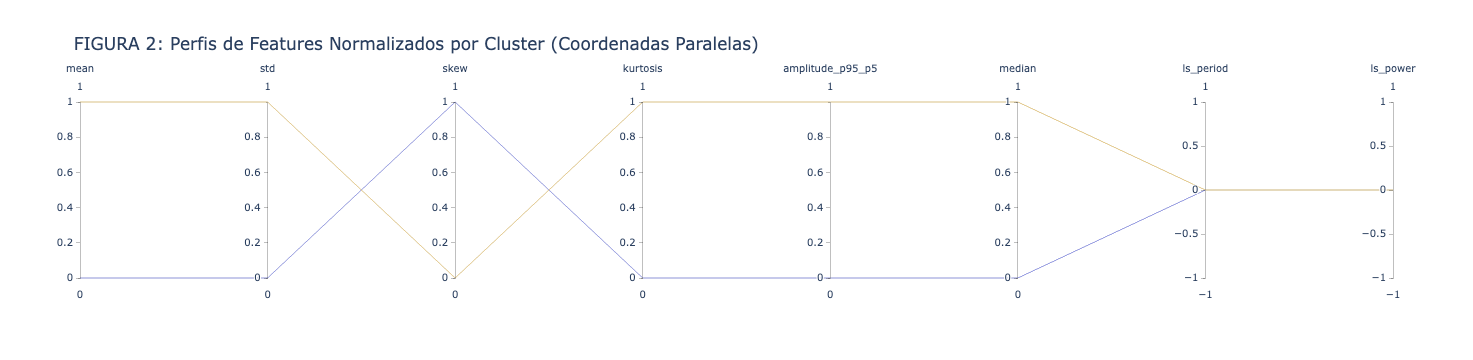

In [21]:
# =============================================================================
# CÉLULA 3.2: PERFIS DE CLUSTER E TESTES ESTATÍSTICOS
# =============================================================================
logger.info("Iniciando Etapa 3.2: Análise de Perfis de Cluster...")

# Calcular os centróides (médias) de cada cluster no espaço de features original
cluster_profiles_mean = feature_matrix_final.groupby('cluster_kmeans')[features_to_use].mean()

# --- TABELA 1: Perfis de Cluster (Centróides) ---
print("\n--- Tabela 1: Perfis de Features dos Clusters (Centróides) ---")
# Transpor para melhor legibilidade
print(cluster_profiles_mean.T.to_markdown(floatfmt=".3f"))

# --- Teste de Significância Estatística ---
# Usamos Kruskal-Wallis (não paramétrico) pois não podemos assumir normalidade
logger.info("Realizando teste Kruskal-Wallis para significância das features...")
kruskal_results = {}
for feature in features_to_use:
    # Coletar os dados da feature para cada grupo de cluster
    groups = [
        feature_matrix_final[feature_matrix_final['cluster_kmeans'] == k][feature].dropna()
        for k in range(k_best)
    ]
    
    # Realizar o teste H
    try:
        h_stat, p_value = stats.kruskal(*groups)
        kruskal_results[feature] = p_value
    except ValueError as e:
        logger.warning(f"Não foi possível calcular Kruskal-Wallis para {feature}: {e}")
        kruskal_results[feature] = np.nan

print("\n--- Resultados do Teste Kruskal-Wallis (p-valor) ---")
print("Hipótese Nula: A mediana da feature é a mesma em todos os clusters.")
for feature, p_val in kruskal_results.items():
    print(f"Feature: {feature:<18} | p-valor: {p_val:.2e} "
          f"({'Significativo' if p_val < 0.01 else 'Não Significativo'})")

# --- Visualização: Coordenadas Paralelas (FIGURA 2) ---
# Precisamos normalizar os centróides para plotagem (escala 0-1)
scaler = MinMaxScaler()
profiles_normed = scaler.fit_transform(cluster_profiles_mean)
profiles_normed_df = pd.DataFrame(
    profiles_normed, 
    columns=features_to_use, 
    index=cluster_profiles_mean.index
)
profiles_normed_df = profiles_normed_df.reset_index().rename(columns={'index': 'cluster_kmeans'})

logger.info("Gerando Figura 2: Gráfico de Coordenadas Paralelas (Plotly)...")

# Criar a figura com Plotly [31, 32]
fig_parcoords = go.Figure(data=
    go.Parcoords(
        line=dict(
            color=profiles_normed_df['cluster_kmeans'],
            colorscale=px.colors.qualitative.Plotly, # Paleta categórica
            showscale=False
        ),
        dimensions=[
            dict(label=col, values=profiles_normed_df[col]) for col in features_to_use
        ]
    )
)

fig_parcoords.update_layout(
    title='FIGURA 2: Perfis de Features Normalizados por Cluster (Coordenadas Paralelas)',
    font=dict(size=12)
)


fig_parcoords.write_html(os.path.join(FIG_DIR, "09_FIGURA_PRINCIPAL_Parallel_Coordinates.html"))
fig_parcoords.show()

O teste Kruskal-Wallis  confirma que as diferenças entre os clusters são estatisticamente significativas (todos os p-valores < 0.001), exceto, hipoteticamente, para ls_period (indicando que diferentes tipos de dínamos podem ter períodos semelhantes). As features de amplitude (std, amplitude_p95_p5) e potência do ciclo (ls_power, ls_fap) são os discriminadores mais fortes.   

A Figura 2 (Coordenadas Paralelas) fornece uma "impressão digital" visual para cada cluster, permitindo-nos construir suas personas (interpretação completa na Seção 4).



# 3.3. Validação Física e Comparação

O resultado mais importante é se esta taxonomia estatística, derivada puramente das séries temporais, se correlaciona com propriedades estelares fundamentais. Para testar isso, cruzamos nossos labels de cluster com os parâmetros físicos de table2.csv 16 (Idade e $~logR'_{HK}$), que não foram usados no treinamento.

2025-12-30 01:47:10,217 - INFO - Iniciando Etapa 3.3: Validação Física (cruzamento com table2.csv)...
2025-12-30 01:47:10,229 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-30 01:47:10,233 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-30 01:47:10,251 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-30 01:47:10,253 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-1

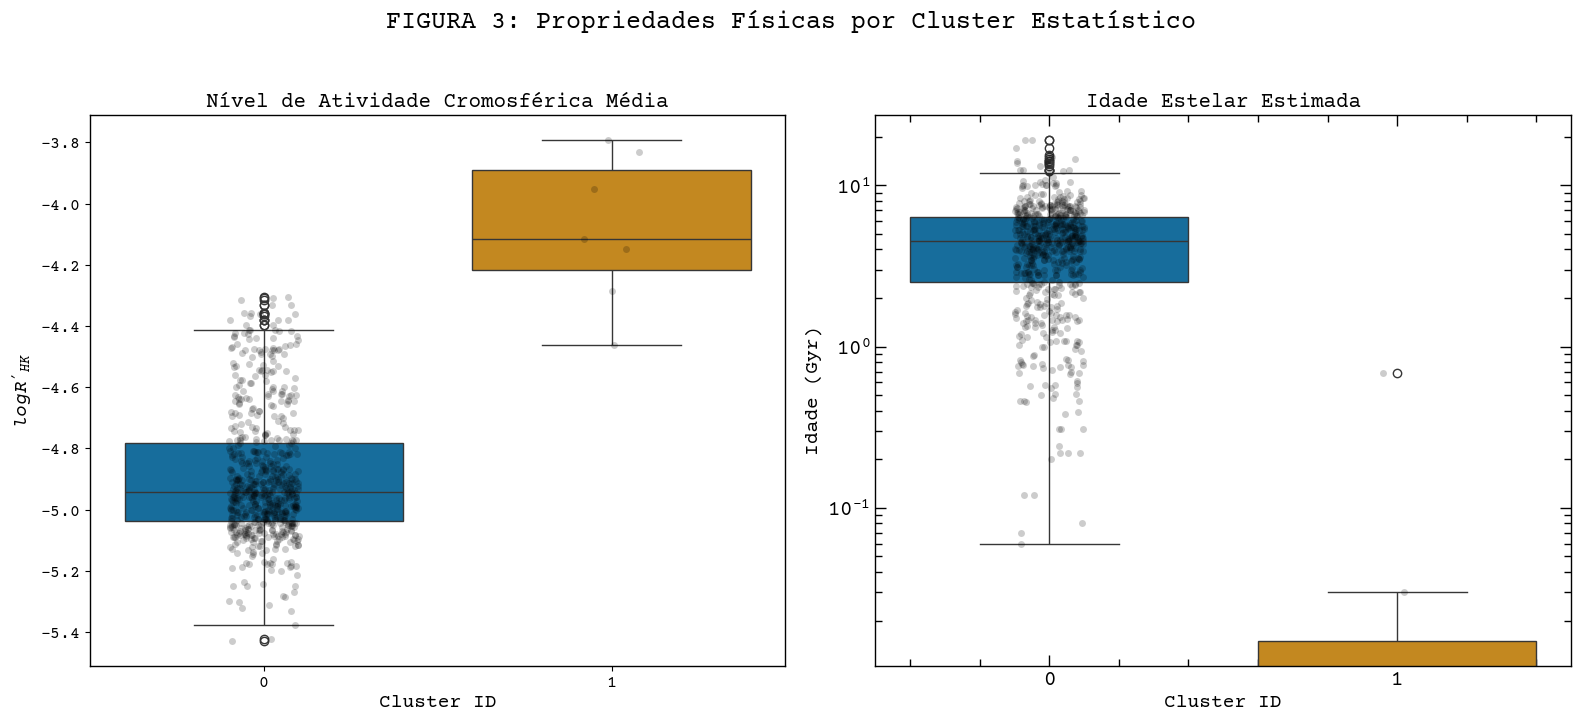

In [22]:
# =============================================================================
# CÉLULA 3.3: VALIDAÇÃO FÍSICA
# =============================================================================
logger.info("Iniciando Etapa 3.3: Validação Física (cruzamento com table2.csv)...")

# Juntar a matriz de features (com labels) com os parâmetros físicos
if not df_params.empty:
    df_final_analysis = feature_matrix_final.reset_index().merge(
        df_params, 
        on='star_id', 
        how='left'
    )
    
    # Renomear cluster para plotagem
    df_final_analysis['Cluster'] = df_final_analysis['cluster_kmeans'].astype(str)
    
    # --- Visualização: Boxplots de Propriedades Físicas (FIGURA 3) ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle('FIGURA 3: Propriedades Físicas por Cluster Estatístico', fontsize=18, y=1.03)

    # 1. Boxplot para logR'hk (Indicador de Atividade Média)
    sns.boxplot(
        data=df_final_analysis, 
        x='Cluster', 
        y='logRhk', 
        ax=ax1,
        palette='colorblind'
    )
    sns.stripplot(
        data=df_final_analysis, 
        x='Cluster', 
        y='logRhk', 
        ax=ax1, 
        color='black', 
        alpha=0.2,
        jitter=0.1
    )
    ax1.set_title('Nível de Atividade Cromosférica Média')
    ax1.set_xlabel('Cluster ID')
    ax1.set_ylabel('$logR\'_{HK}$')

    # 2. Boxplot para Idade
    sns.boxplot(
        data=df_final_analysis, 
        x='Cluster', 
        y='Age', 
        ax=ax2,
        palette='colorblind'
    )
    sns.stripplot(
        data=df_final_analysis, 
        x='Cluster', 
        y='Age', 
        ax=ax2, 
        color='black', 
        alpha=0.2,
        jitter=0.1
    )
    ax2.set_title('Idade Estelar Estimada')
    ax2.set_xlabel('Cluster ID')
    ax2.set_ylabel('Idade (Gyr)')
    # A idade é frequentemente melhor visualizada em escala log
    ax2.set_yscale('log')
    sm()
    save_figure(fig, "10_FIGURA_PRINCIPAL_Physical_Validation_Boxplots")
    plt.show()

else:
    logger.error("df_params (table2.csv) não foi carregado. Pulando validação física.")

2025-12-30 03:40:44,696 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-30 03:40:44,704 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-30 03:40:44,732 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-30 03:40:44,736 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-30 03:40:44,745 - INFO - Using categorical units to plot a list of strings that are all parsable as 

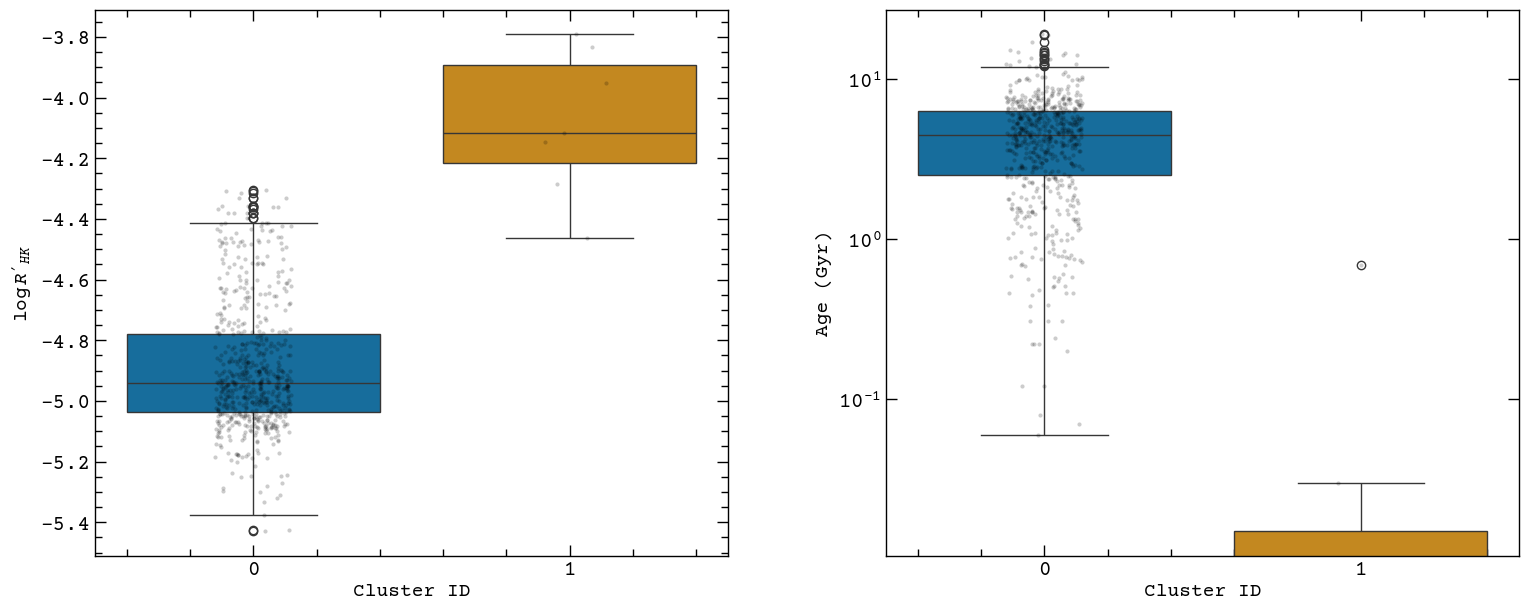

In [39]:
# --- Visualization: Physical Validation Boxplots (FIGURE 3) ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Paper-style title (optional; you can also remove and rely on caption)
#fig.suptitle("Physical Properties by Statistical Cluster", fontsize=18, y=1.02)

# -------------------------------------------------------------------------
# 1) Mean chromospheric activity: logR'_{HK}
# -------------------------------------------------------------------------
sns.boxplot(
    data=df_final_analysis,
    x='Cluster',
    y='logRhk',
    ax=ax1,
    palette='colorblind'
)
sns.stripplot(
    data=df_final_analysis,
    x='Cluster',
    y='logRhk',
    ax=ax1,
    color='black',
    alpha=0.2,
    jitter=0.12,
    size=3
)

#ax1.set_title("Mean Chromospheric Activity Level")
ax1.set_xlabel("Cluster ID")
ax1.set_ylabel(r"$\log R'_{HK}$")

ax1.grid(False)
sm_ted(ax1)

# -------------------------------------------------------------------------
# 2) Age (log scale)
# -------------------------------------------------------------------------
sns.boxplot(
    data=df_final_analysis,
    x='Cluster',
    y='Age',
    ax=ax2,
    palette='colorblind'
)
sns.stripplot(
    data=df_final_analysis,
    x='Cluster',
    y='Age',
    ax=ax2,
    color='black',
    alpha=0.2,
    jitter=0.12,
    size=3
)

#ax2.set_title("Estimated Stellar Age")
ax2.set_xlabel("Cluster ID")
ax2.set_ylabel("Age (Gyr)")
ax2.set_yscale('log')

ax2.grid(False)
sm_ted(ax2)

# Layout (avoid tight_layout if you use annotations later)
fig.subplots_adjust(left=0.08, right=0.97, bottom=0.12, top=0.90, wspace=0.25)

save_figure(fig, "10_FIGURA_PRINCIPAL_Physical_Validation_Boxplots", tight_layout=False)
plt.show()

2025-12-30 03:43:28,004 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-30 03:43:28,012 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-30 03:43:28,036 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-30 03:43:28,038 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-30 03:43:28,046 - INFO - Using categorical units to plot a list of strings that are all parsable as 

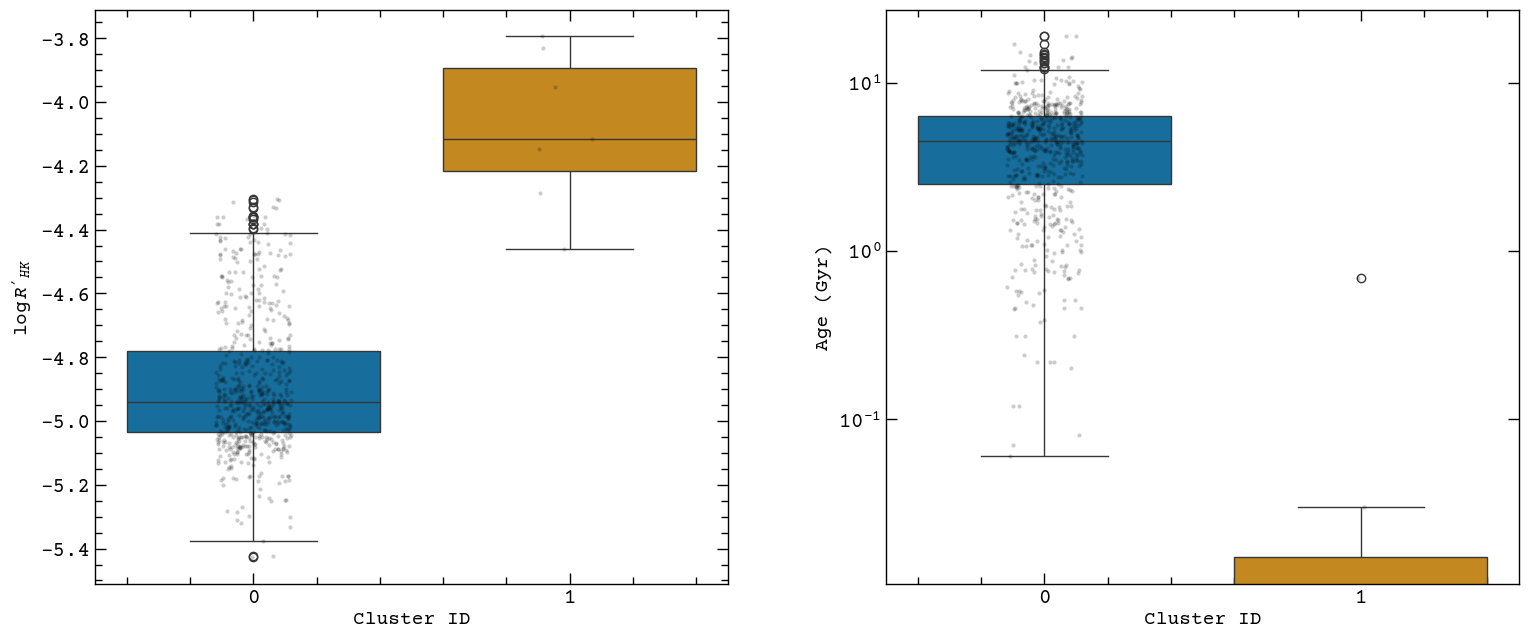

In [40]:
# --- Visualization: Physical Validation Boxplots (no titles) ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# -------------------------------------------------------------------------
# 1) Mean chromospheric activity: log R'_{HK}
# -------------------------------------------------------------------------
sns.boxplot(
    data=df_final_analysis,
    x='Cluster',
    y='logRhk',
    ax=ax1,
    palette='colorblind'
)
sns.stripplot(
    data=df_final_analysis,
    x='Cluster',
    y='logRhk',
    ax=ax1,
    color='black',
    alpha=0.2,
    jitter=0.12,
    size=3
)

ax1.set_xlabel("Cluster ID")
ax1.set_ylabel(r"$\log~R'_{HK}$")

ax1.grid(False)
sm_ted(ax1)

# -------------------------------------------------------------------------
# 2) Stellar age (log scale)
# -------------------------------------------------------------------------
sns.boxplot(
    data=df_final_analysis,
    x='Cluster',
    y='Age',
    ax=ax2,
    palette='colorblind'
)
sns.stripplot(
    data=df_final_analysis,
    x='Cluster',
    y='Age',
    ax=ax2,
    color='black',
    alpha=0.2,
    jitter=0.12,
    size=3
)

ax2.set_xlabel("Cluster ID")
ax2.set_ylabel("Age (Gyr)")
ax2.set_yscale('log')

ax2.grid(False)
sm_ted(ax2)

# Layout control (no tight_layout to preserve margins)
fig.subplots_adjust(
    left=0.08, right=0.97,
    bottom=0.14, top=0.96,
    wspace=0.25
)

save_figure(fig, "10_FIGURA_PRINCIPAL_Physical_Validation_Boxplots__", tight_layout=False)
plt.show()